In [523]:
import pandas as pd
import json

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import datetime
from time import strftime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

import datetime
from time import strftime

In [524]:
import json
import pandas as pd

df3=pd.read_csv("boulder_gov_dataset.csv")

In [525]:
df3

,ObjectId,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,BOULDER / CARPENTER PARK2,1505 30th St,Boulder,Colorado,80303,5/24/2021 11:06,MDT,5/24/2021 11:51,MDT,0:44:48,0:44:30,4.460,3.167,0.560,Level 2
25573,25574,COMM VITALITY / 1500PEARL2,1500 Pearl St,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 14:00,MDT,2:28:30,2:28:10,15.173,10.773,1.904,Level 2
25574,25575,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 13:47,MDT,2:15:32,2:15:04,14.896,10.576,1.869,Level 2
25575,25576,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,5/24/2021 11:55,MDT,5/24/2021 13:42,MDT,1:46:48,1:46:32,5.914,4.199,0.742,Level 2


In [526]:
df3.columns

Index(['ObjectId', 'Station_Name', 'Address', 'City', 'State_Province',
       'Zip_Postal_Code', 'Start_Date___Time', 'Start_Time_Zone',
       'End_Date___Time', 'End_Time_Zone', 'Total_Duration__hh_mm_ss_',
       'Charging_Time__hh_mm_ss_', 'Energy__kWh_', 'GHG_Savings__kg_',
       'Gasoline_Savings__gallons_', 'Port_Type'],
      dtype='object')

In [527]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25577 entries, 0 to 25576
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ObjectId                    25577 non-null  int64  
 1   Station_Name                25577 non-null  object 
 2   Address                     25577 non-null  object 
 3   City                        25577 non-null  object 
 4   State_Province              25577 non-null  object 
 5   Zip_Postal_Code             25577 non-null  int64  
 6   Start_Date___Time           25577 non-null  object 
 7   Start_Time_Zone             25577 non-null  object 
 8   End_Date___Time             25576 non-null  object 
 9   End_Time_Zone               25577 non-null  object 
 10  Total_Duration__hh_mm_ss_   25577 non-null  object 
 11  Charging_Time__hh_mm_ss_    25577 non-null  object 
 12  Energy__kWh_                25577 non-null  float64
 13  GHG_Savings__kg_            255

In [528]:
df3.isnull().sum()

ObjectId                      0
Station_Name                  0
Address                       0
City                          0
State_Province                0
Zip_Postal_Code               0
Start_Date___Time             0
Start_Time_Zone               0
End_Date___Time               1
End_Time_Zone                 0
Total_Duration__hh_mm_ss_     0
Charging_Time__hh_mm_ss_      0
Energy__kWh_                  0
GHG_Savings__kg_              0
Gasoline_Savings__gallons_    0
Port_Type                     0
dtype: int64

In [529]:
df3=df3.dropna()

In [530]:
#bins = [0,5, 10,15, 20,25, 30,35, 40,45, 50,55, 60,65, 70, 75,80,85, 90]
#df3['binned_energy'] = pd.cut(df3['Energy__kWh_'], bins)


In [531]:
#plt.figure(figsize=(15,10))
#ax = sns.countplot(x=df3.binned_energy, data=df3)
#ax.set_title("energy kwh")
#plt.show()
#print("energy binned\n")
#print(df3.groupby(['binned_energy']).size())

In [532]:
# Print Unique Values of columns

print("Unique Values in `Station_Name` => {}".format(df3['Station_Name'].unique()))
print('\n')

Unique Values in `Station_Name` => ['BOULDER / JUNCTION ST1' 'BOULDER / ALPINE ST1' 'BOULDER / BASELINE ST1'
 'BOULDER / FACILITIES ST1' 'COMM VITALITY / 1500PEARL2'
 'BOULDER / ATRIUM ST1' 'BOULDER / REC CENTER ST1'
 'BOULDER / REC CENTER ST2' 'COMM VITALITY / 1500PEARL1'
 'COMM VITALITY / 1104 SPRUCE1' 'COMM VITALITY / 1000WALNUT2'
 'COMM VITALITY / 1000WALNUT1' 'COMM VITALITY / 1400 WALNUT1'
 'COMM VITALITY / 1100WALNUT1' 'COMM VITALITY / BOULDER JCTN'
 'BOULDER / ANNEX ST1' 'BOULDER / N BOULDER REC 1'
 'BOULDER / BOULDER PARK S2' 'BOULDER / BOULDER PARK S1'
 'COMM VITALITY / 2200 BROADWAY1' 'BOULDER / EAST REC'
 'BOULDERJUNCTION / JUNCTION ST1' 'BOULDER / RESERVOIR ST1'
 'BOULDER / RESERVOIR ST2' 'BOULDER / CARPENTER PARK1'
 'BOULDER / CARPENTER PARK2' 'BOULDER / AIRPORT ST1']




In [533]:
# Print Unique Values of columns

print("Unique Values in `Address` => {}".format(df3['Address'].unique()))
print('\n')

Unique Values in `Address` => ['2280 Junction Pl' '1275 Alpine Ave' '900 Baseline Rd' '1745 14th street'
 '1500 Pearl St' '1770 13th St' '1360 Gillaspie Dr' '1100 Spruce St'
 '900 Walnut St' '1400 Walnut St' '1100 Walnut' '2052 Junction Pl'
 '7315 Red Deer Dr' '3172 Broadway' '1739 Broadway' '2150 13th St'
 '5660 Sioux Dr' '5565 51st St' '1505 30th St' '3335 Airport Rd']




In [534]:
# Print Unique Values of columns

print("Unique Values in `City` => {}".format(df3['City'].unique()))
print('\n')

Unique Values in `City` => ['Boulder']




In [535]:
# Print Unique Values of columns

print("Unique Values in `State_Province` => {}".format(df3['State_Province'].unique()))
print('\n')

Unique Values in `State_Province` => ['Colorado']




In [536]:
# Print Unique Values of columns

print("Unique Values in `Zip_Postal_Code` => {}".format(df3['Zip_Postal_Code'].unique()))
print('\n')

Unique Values in `Zip_Postal_Code` => [80301 80304 80302 80305 80303]




In [537]:
# Print Unique Values of columns

print("Unique Values in `Start_Time_Zone` => {}".format(df3['Start_Time_Zone'].unique()))
print('\n')

Unique Values in `Start_Time_Zone` => ['MDT']




In [538]:
# Print Unique Values of columns

print("Unique Values in `End_Time_Zone` => {}".format(df3['End_Time_Zone'].unique()))
print('\n')

Unique Values in `End_Time_Zone` => ['MDT']




In [539]:
# Print Unique Values of columns

print("Unique Values in `Port_Type` => {}".format(df3['Port_Type'].unique()))
print('\n')

Unique Values in `Port_Type` => ['Level 2']




In [540]:
# get tme and date from timestamp
df3['Charge_start_timestamp'] = pd.to_datetime(df3['Start_Date___Time'])
df3['Start_date'] = df3['Charge_start_timestamp'].dt.date

df3['Start_date_month'] = df3['Charge_start_timestamp'].dt.month
df3['Start_date_day'] = df3['Charge_start_timestamp'].dt.day
df3['Start_date_year'] = df3['Charge_start_timestamp'].dt.year
df3['startdayOfWeek'] = df3['Charge_start_timestamp'].dt.dayofweek
df3['startdayOfWeekname'] = df3['Charge_start_timestamp'].dt.day_name()


df3['Start_time'] = df3['Charge_start_timestamp'].dt.time

time1 = pd.DatetimeIndex(df3['Charge_start_timestamp'])
df3['start_time_in_minutes']=time1.hour * 60 + time1.minute
df3['start_time_in_hrs']=df3['start_time_in_minutes'].div(60).round(2)
df3['start_time_in_hrs_int'] = df3['start_time_in_hrs'].astype(int)


df3['start_time_in_hrs_round_0']=df3['start_time_in_minutes'].div(60).round(0)






<ipython-input-540-0cae3b105f03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Charge_start_timestamp'] = pd.to_datetime(df3['Start_Date___Time'])
<ipython-input-540-0cae3b105f03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Start_date'] = df3['Charge_start_timestamp'].dt.date
<ipython-input-540-0cae3b105f03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [541]:
# get tme and date from timestamp
df3['Charge_end_timestamp'] = pd.to_datetime(df3['End_Date___Time'])
df3['End_date'] = df3['Charge_end_timestamp'].dt.date

df3['End_date_month'] = df3['Charge_end_timestamp'].dt.month
df3['End_date_day'] = df3['Charge_end_timestamp'].dt.day
df3['End_date_year'] = df3['Charge_end_timestamp'].dt.year
df3['enddayOfWeek'] = df3['Charge_end_timestamp'].dt.dayofweek
df3['enddayOfWeekname'] = df3['Charge_end_timestamp'].dt.day_name()


df3['End_time'] = df3['Charge_end_timestamp'].dt.time

time2 = pd.DatetimeIndex(df3['Charge_end_timestamp'])
df3['end_time_in_minutes']=time2.hour * 60 + time2.minute
df3['end_time_in_hrs']=df3['end_time_in_minutes'].div(60).round(2)
df3['end_time_in_hrs_int'] = df3['end_time_in_hrs'].astype(int)



<ipython-input-541-e07e2803a1d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Charge_end_timestamp'] = pd.to_datetime(df3['End_Date___Time'])
<ipython-input-541-e07e2803a1d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['End_date'] = df3['Charge_end_timestamp'].dt.date
<ipython-input-541-e07e2803a1d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [542]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25576 entries, 0 to 25576
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ObjectId                    25576 non-null  int64         
 1   Station_Name                25576 non-null  object        
 2   Address                     25576 non-null  object        
 3   City                        25576 non-null  object        
 4   State_Province              25576 non-null  object        
 5   Zip_Postal_Code             25576 non-null  int64         
 6   Start_Date___Time           25576 non-null  object        
 7   Start_Time_Zone             25576 non-null  object        
 8   End_Date___Time             25576 non-null  object        
 9   End_Time_Zone               25576 non-null  object        
 10  Total_Duration__hh_mm_ss_   25576 non-null  object        
 11  Charging_Time__hh_mm_ss_    25576 non-null  object    

In [543]:
df3

,ObjectId,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,...,End_date,End_date_month,End_date_day,End_date_year,enddayOfWeek,enddayOfWeekname,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int
0,1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,...,2018-01-01,1,1,2018,0,Monday,19:52:00,1192,19.87,19
1,2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,...,2018-01-02,1,2,2018,1,Tuesday,09:16:00,556,9.27,9
2,3,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,...,2018-01-03,1,3,2018,2,Wednesday,06:23:00,383,6.38,6
3,4,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,...,2018-01-03,1,3,2018,2,Wednesday,11:14:00,674,11.23,11
4,5,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,...,2018-01-03,1,3,2018,2,Wednesday,14:30:00,870,14.50,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,BOULDER / CARPENTER PARK2,1505 30th St,Boulder,Colorado,80303,5/24/2021 11:06,MDT,5/24/2021 11:51,MDT,...,2021-05-24,5,24,2021,0,Monday,11:51:00,711,11.85,11
25573,25574,COMM VITALITY / 1500PEARL2,1500 Pearl St,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 14:00,MDT,...,2021-05-24,5,24,2021,0,Monday,14:00:00,840,14.00,14
25574,25575,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,5/24/2021 11:31,MDT,5/24/2021 13:47,MDT,...,2021-05-24,5,24,2021,0,Monday,13:47:00,827,13.78,13
25575,25576,COMM VITALITY / 1104 SPRUCE1,1100 Spruce St,Boulder,Colorado,80302,5/24/2021 11:55,MDT,5/24/2021 13:42,MDT,...,2021-05-24,5,24,2021,0,Monday,13:42:00,822,13.70,13


In [544]:
newdf=df3.drop(columns=['Station_Name', 'Address','City','State_Province','Zip_Postal_Code','Start_Date___Time','End_Date___Time','End_Time_Zone','Port_Type','Start_Time_Zone','Start_date','End_date','enddayOfWeekname','startdayOfWeekname','Total_Duration__hh_mm_ss_','Charging_Time__hh_mm_ss_'])

In [545]:
newdf

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,...,start_time_in_hrs_round_0,Charge_end_timestamp,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int
0,1,6.504,2.732,0.816,2018-01-01 17:49:00,1,1,2018,0,17:49:00,...,18.0,2018-01-01 19:52:00,1,1,2018,0,19:52:00,1192,19.87,19
1,2,2.481,1.042,0.311,2018-01-02 08:52:00,1,2,2018,1,08:52:00,...,9.0,2018-01-02 09:16:00,1,2,2018,1,09:16:00,556,9.27,9
2,3,15.046,6.319,1.888,2018-01-02 21:11:00,1,2,2018,1,21:11:00,...,21.0,2018-01-03 06:23:00,1,3,2018,2,06:23:00,383,6.38,6
3,4,6.947,2.918,0.872,2018-01-03 09:19:00,1,3,2018,2,09:19:00,...,9.0,2018-01-03 11:14:00,1,3,2018,2,11:14:00,674,11.23,11
4,5,1.800,0.756,0.226,2018-01-03 14:13:00,1,3,2018,2,14:13:00,...,14.0,2018-01-03 14:30:00,1,3,2018,2,14:30:00,870,14.50,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,4.460,3.167,0.560,2021-05-24 11:06:00,5,24,2021,0,11:06:00,...,11.0,2021-05-24 11:51:00,5,24,2021,0,11:51:00,711,11.85,11
25573,25574,15.173,10.773,1.904,2021-05-24 11:31:00,5,24,2021,0,11:31:00,...,12.0,2021-05-24 14:00:00,5,24,2021,0,14:00:00,840,14.00,14
25574,25575,14.896,10.576,1.869,2021-05-24 11:31:00,5,24,2021,0,11:31:00,...,12.0,2021-05-24 13:47:00,5,24,2021,0,13:47:00,827,13.78,13
25575,25576,5.914,4.199,0.742,2021-05-24 11:55:00,5,24,2021,0,11:55:00,...,12.0,2021-05-24 13:42:00,5,24,2021,0,13:42:00,822,13.70,13


In [546]:
newdf['charge_duration_in_minutes']=(newdf.Charge_end_timestamp-newdf.Charge_start_timestamp).astype('timedelta64[m]')

newdf['charge_duration_in_hours']=newdf['charge_duration_in_minutes'].div(60).round(2)

In [547]:
#time2 = pd.DatetimeIndex(df3['Charge_end_timestamp'])
#df3['end_time_in_minutes']=time2.hour * 60 + time2.minute
#newdf['charge_duration_in_hours']=newdf['charge_duration_in_minutes'].div(60).round(2)

In [548]:
# max charging duration
#newdf['charge_duration_in_hours'].max()

newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25576 entries, 0 to 25576
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ObjectId                    25576 non-null  int64         
 1   Energy__kWh_                25576 non-null  float64       
 2   GHG_Savings__kg_            25576 non-null  float64       
 3   Gasoline_Savings__gallons_  25576 non-null  float64       
 4   Charge_start_timestamp      25576 non-null  datetime64[ns]
 5   Start_date_month            25576 non-null  int64         
 6   Start_date_day              25576 non-null  int64         
 7   Start_date_year             25576 non-null  int64         
 8   startdayOfWeek              25576 non-null  int64         
 9   Start_time                  25576 non-null  object        
 10  start_time_in_minutes       25576 non-null  int64         
 11  start_time_in_hrs           25576 non-null  float64   

In [549]:
# min charging duration
#newdf['charge_duration_in_minutes'].min()


In [550]:
#bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 28183]
#newdf['binned_duration_in_minutes'] = pd.cut(newdf['charge_duration_in_minutes'], bins)



In [551]:
#plt.figure(figsize=(15,10))
#ax = sns.countplot(x=newdf.binned_duration_in_minutes, data=newdf)
#ax.set_title("charge_duration_in_minutes")
#plt.show()
#print("binned_duration_in_minutes\n")
#print(newdf.groupby(['binned_duration_in_minutes']).size())

In [552]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [553]:
newdf.head()

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,...,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours
0,1,6.504,2.732,0.816,2018-01-01 17:49:00,1,1,2018,0,17:49:00,...,1,1,2018,0,19:52:00,1192,19.87,19,123.0,2.05
1,2,2.481,1.042,0.311,2018-01-02 08:52:00,1,2,2018,1,08:52:00,...,1,2,2018,1,09:16:00,556,9.27,9,24.0,0.40
2,3,15.046,6.319,1.888,2018-01-02 21:11:00,1,2,2018,1,21:11:00,...,1,3,2018,2,06:23:00,383,6.38,6,552.0,9.20
3,4,6.947,2.918,0.872,2018-01-03 09:19:00,1,3,2018,2,09:19:00,...,1,3,2018,2,11:14:00,674,11.23,11,115.0,1.92
4,5,1.800,0.756,0.226,2018-01-03 14:13:00,1,3,2018,2,14:13:00,...,1,3,2018,2,14:30:00,870,14.50,14,17.0,0.28


In [554]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25576 entries, 0 to 25576
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ObjectId                    25576 non-null  int64         
 1   Energy__kWh_                25576 non-null  float64       
 2   GHG_Savings__kg_            25576 non-null  float64       
 3   Gasoline_Savings__gallons_  25576 non-null  float64       
 4   Charge_start_timestamp      25576 non-null  datetime64[ns]
 5   Start_date_month            25576 non-null  int64         
 6   Start_date_day              25576 non-null  int64         
 7   Start_date_year             25576 non-null  int64         
 8   startdayOfWeek              25576 non-null  int64         
 9   Start_time                  25576 non-null  object        
 10  start_time_in_minutes       25576 non-null  int64         
 11  start_time_in_hrs           25576 non-null  float64   

In [555]:
# gathering all records for month of january
df_jan=newdf[newdf['Start_date_month'] ==1]

In [556]:
df_jan

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,...,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours
0,1,6.504,2.732,0.816,2018-01-01 17:49:00,1,1,2018,0,17:49:00,...,1,1,2018,0,19:52:00,1192,19.87,19,123.0,2.05
1,2,2.481,1.042,0.311,2018-01-02 08:52:00,1,2,2018,1,08:52:00,...,1,2,2018,1,09:16:00,556,9.27,9,24.0,0.40
2,3,15.046,6.319,1.888,2018-01-02 21:11:00,1,2,2018,1,21:11:00,...,1,3,2018,2,06:23:00,383,6.38,6,552.0,9.20
3,4,6.947,2.918,0.872,2018-01-03 09:19:00,1,3,2018,2,09:19:00,...,1,3,2018,2,11:14:00,674,11.23,11,115.0,1.92
4,5,1.800,0.756,0.226,2018-01-03 14:13:00,1,3,2018,2,14:13:00,...,1,3,2018,2,14:30:00,870,14.50,14,17.0,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23195,23196,8.645,3.631,1.085,2021-01-22 12:40:00,1,22,2021,4,12:40:00,...,1,22,2021,4,14:08:00,848,14.13,14,88.0,1.47
23196,23197,11.491,4.826,1.442,2021-01-22 13:12:00,1,22,2021,4,13:12:00,...,1,22,2021,4,15:08:00,908,15.13,15,116.0,1.93
23197,23198,1.973,0.829,0.248,2021-01-22 15:01:00,1,22,2021,4,15:01:00,...,1,22,2021,4,15:36:00,936,15.60,15,35.0,0.58
23198,23199,3.607,1.515,0.453,2021-01-22 15:01:00,1,22,2021,4,15:01:00,...,1,22,2021,4,16:07:00,967,16.12,16,66.0,1.10


In [557]:
# gathering all records for january 2018
df_jan_2018=df_jan[df_jan['Start_date_year'] ==2018]

In [558]:
df_jan_2018

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,...,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours
0,1,6.504,2.732,0.816,2018-01-01 17:49:00,1,1,2018,0,17:49:00,...,1,1,2018,0,19:52:00,1192,19.87,19,123.0,2.05
1,2,2.481,1.042,0.311,2018-01-02 08:52:00,1,2,2018,1,08:52:00,...,1,2,2018,1,09:16:00,556,9.27,9,24.0,0.40
2,3,15.046,6.319,1.888,2018-01-02 21:11:00,1,2,2018,1,21:11:00,...,1,3,2018,2,06:23:00,383,6.38,6,552.0,9.20
3,4,6.947,2.918,0.872,2018-01-03 09:19:00,1,3,2018,2,09:19:00,...,1,3,2018,2,11:14:00,674,11.23,11,115.0,1.92
4,5,1.800,0.756,0.226,2018-01-03 14:13:00,1,3,2018,2,14:13:00,...,1,3,2018,2,14:30:00,870,14.50,14,17.0,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,3.800,1.596,0.477,2018-01-30 13:53:00,1,30,2018,1,13:53:00,...,1,30,2018,1,15:24:00,924,15.40,15,91.0,1.52
251,252,3.331,1.399,0.418,2018-01-30 14:46:00,1,30,2018,1,14:46:00,...,1,30,2018,1,15:29:00,929,15.48,15,43.0,0.72
252,253,5.634,2.366,0.707,2018-01-30 16:14:00,1,30,2018,1,16:14:00,...,1,30,2018,1,17:12:00,1032,17.20,17,58.0,0.97
253,254,1.295,0.544,0.162,2018-01-30 17:48:00,1,30,2018,1,17:48:00,...,1,30,2018,1,18:40:00,1120,18.67,18,52.0,0.87


<AxesSubplot:xlabel='start_time_in_minutes'>

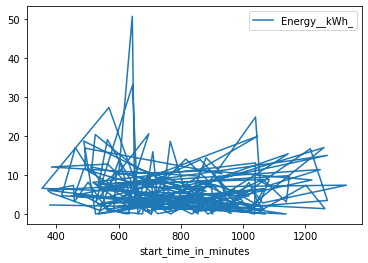

In [559]:
# plot for month of january 2018 / nearly 209 rows
df_jan_2018.plot(x='start_time_in_minutes', y='Energy__kWh_', label='Energy__kWh_') 

In [560]:
# gathering all records for february 
df_feb=newdf[newdf['Start_date_month'] ==2 ]

In [561]:
df_feb

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,...,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours
109,110,7.664,3.219,0.962,2018-02-01 07:43:00,2,1,2018,3,07:43:00,...,2,1,2018,3,11:14:00,674,11.23,11,211.0,3.52
110,111,12.089,5.078,1.517,2018-02-01 08:23:00,2,1,2018,3,08:23:00,...,2,1,2018,3,10:25:00,625,10.42,10,122.0,2.03
111,112,4.818,2.023,0.605,2018-02-01 11:14:00,2,1,2018,3,11:14:00,...,2,1,2018,3,12:01:00,721,12.02,12,47.0,0.78
112,113,7.194,3.021,0.903,2018-02-01 11:20:00,2,1,2018,3,11:20:00,...,2,1,2018,3,14:03:00,843,14.05,14,163.0,2.72
113,114,28.961,12.163,3.635,2018-02-01 11:33:00,2,1,2018,3,11:33:00,...,2,1,2018,3,15:48:00,948,15.80,15,255.0,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23595,23596,4.219,2.995,0.529,2021-02-21 11:11:00,2,21,2021,6,11:11:00,...,2,21,2021,6,11:54:00,714,11.90,11,43.0,0.72
23596,23597,15.049,10.685,1.889,2021-02-21 11:11:00,2,21,2021,6,11:11:00,...,2,21,2021,6,15:32:00,932,15.53,15,261.0,4.35
23597,23598,0.000,0.000,0.000,2021-02-21 11:11:00,2,21,2021,6,11:11:00,...,2,21,2021,6,11:12:00,672,11.20,11,1.0,0.02
23598,23599,2.808,1.994,0.352,2021-02-21 11:13:00,2,21,2021,6,11:13:00,...,2,21,2021,6,11:41:00,701,11.68,11,28.0,0.47


In [562]:
# gathering all records for february 2018
df_feb_2018=df_feb[df_feb['Start_date_year'] ==2018 ]

In [563]:
df_feb_2018

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,...,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours
109,110,7.664,3.219,0.962,2018-02-01 07:43:00,2,1,2018,3,07:43:00,...,2,1,2018,3,11:14:00,674,11.23,11,211.0,3.52
110,111,12.089,5.078,1.517,2018-02-01 08:23:00,2,1,2018,3,08:23:00,...,2,1,2018,3,10:25:00,625,10.42,10,122.0,2.03
111,112,4.818,2.023,0.605,2018-02-01 11:14:00,2,1,2018,3,11:14:00,...,2,1,2018,3,12:01:00,721,12.02,12,47.0,0.78
112,113,7.194,3.021,0.903,2018-02-01 11:20:00,2,1,2018,3,11:20:00,...,2,1,2018,3,14:03:00,843,14.05,14,163.0,2.72
113,114,28.961,12.163,3.635,2018-02-01 11:33:00,2,1,2018,3,11:33:00,...,2,1,2018,3,15:48:00,948,15.80,15,255.0,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,669,5.518,2.318,0.692,2018-02-28 15:07:00,2,28,2018,2,15:07:00,...,2,28,2018,2,16:39:00,999,16.65,16,92.0,1.53
669,670,2.905,1.220,0.365,2018-02-28 16:06:00,2,28,2018,2,16:06:00,...,2,28,2018,2,17:14:00,1034,17.23,17,68.0,1.13
670,671,4.036,1.695,0.506,2018-02-28 17:19:00,2,28,2018,2,17:19:00,...,2,28,2018,2,18:00:00,1080,18.00,18,41.0,0.68
671,672,6.554,2.753,0.823,2018-02-28 17:49:00,2,28,2018,2,17:49:00,...,2,28,2018,2,18:54:00,1134,18.90,18,65.0,1.08


<AxesSubplot:xlabel='start_time_in_minutes'>

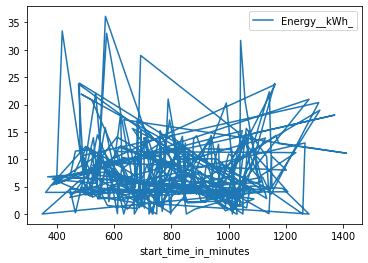

In [564]:
# plot for month of february 2018 / nearly 308 rows
df_feb_2018.plot(x='start_time_in_minutes', y='Energy__kWh_', label='Energy__kWh_') 

In [565]:
# gathering all records for july
df_july=newdf[newdf['Start_date_month'] ==7]

In [566]:
# gathering all records for july 2018
df_july_2018=df_july[df_july['Start_date_year'] ==2018]

In [567]:
df_july_2018_day=df_july_2018[df_july_2018['Start_date_day'] ==1]

<AxesSubplot:xlabel='start_time_in_minutes'>

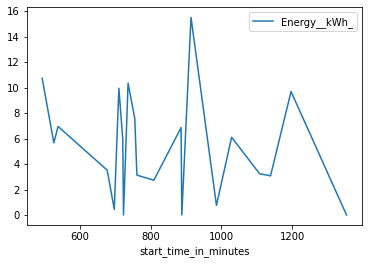

In [568]:
# plot for month of july 2018 / nearly 531 rows
df_july_2018_day.plot(x='start_time_in_minutes', y='Energy__kWh_', label='Energy__kWh_') 

In [569]:
df_july_2018_day


,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,...,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours
2532,2533,10.729,4.506,1.347,2018-07-01 08:13:00,7,1,2018,6,08:13:00,...,7,1,2018,6,10:01:00,601,10.02,10,108.0,1.80
2535,2536,5.662,2.378,0.711,2018-07-01 08:46:00,7,1,2018,6,08:46:00,...,7,1,2018,6,09:42:00,582,9.70,9,56.0,0.93
2540,2541,6.945,2.917,0.872,2018-07-01 08:58:00,7,1,2018,6,08:58:00,...,7,1,2018,6,11:05:00,665,11.08,11,127.0,2.12
2583,2584,3.515,1.476,0.441,2018-07-01 11:17:00,7,1,2018,6,11:17:00,...,7,1,2018,6,12:24:00,744,12.40,12,67.0,1.12
2588,2589,0.438,0.184,0.055,2018-07-01 11:37:00,7,1,2018,6,11:37:00,...,7,1,2018,6,11:45:00,705,11.75,11,8.0,0.13
2592,2593,9.939,4.174,1.247,2018-07-01 11:50:00,7,1,2018,6,11:50:00,...,7,1,2018,6,13:21:00,801,13.35,13,91.0,1.52
2596,2597,5.946,2.497,0.746,2018-07-01 12:01:00,7,1,2018,6,12:01:00,...,7,1,2018,6,13:49:00,829,13.82,13,108.0,1.80
2638,2639,0.000,0.000,0.000,2018-07-01 12:03:00,7,1,2018,6,12:03:00,...,7,1,2018,6,12:05:00,725,12.08,12,2.0,0.03
2642,2643,10.341,4.343,1.298,2018-07-01 12:16:00,7,1,2018,6,12:16:00,...,7,1,2018,6,14:00:00,840,14.00,14,104.0,1.73
2646,2647,7.572,3.180,0.950,2018-07-01 12:35:00,7,1,2018,6,12:35:00,...,7,1,2018,6,14:13:00,853,14.22,14,98.0,1.63


In [570]:
newdf

,ObjectId,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Charge_start_timestamp,Start_date_month,Start_date_day,Start_date_year,startdayOfWeek,Start_time,...,End_date_month,End_date_day,End_date_year,enddayOfWeek,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours
0,1,6.504,2.732,0.816,2018-01-01 17:49:00,1,1,2018,0,17:49:00,...,1,1,2018,0,19:52:00,1192,19.87,19,123.0,2.05
1,2,2.481,1.042,0.311,2018-01-02 08:52:00,1,2,2018,1,08:52:00,...,1,2,2018,1,09:16:00,556,9.27,9,24.0,0.40
2,3,15.046,6.319,1.888,2018-01-02 21:11:00,1,2,2018,1,21:11:00,...,1,3,2018,2,06:23:00,383,6.38,6,552.0,9.20
3,4,6.947,2.918,0.872,2018-01-03 09:19:00,1,3,2018,2,09:19:00,...,1,3,2018,2,11:14:00,674,11.23,11,115.0,1.92
4,5,1.800,0.756,0.226,2018-01-03 14:13:00,1,3,2018,2,14:13:00,...,1,3,2018,2,14:30:00,870,14.50,14,17.0,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,4.460,3.167,0.560,2021-05-24 11:06:00,5,24,2021,0,11:06:00,...,5,24,2021,0,11:51:00,711,11.85,11,45.0,0.75
25573,25574,15.173,10.773,1.904,2021-05-24 11:31:00,5,24,2021,0,11:31:00,...,5,24,2021,0,14:00:00,840,14.00,14,149.0,2.48
25574,25575,14.896,10.576,1.869,2021-05-24 11:31:00,5,24,2021,0,11:31:00,...,5,24,2021,0,13:47:00,827,13.78,13,136.0,2.27
25575,25576,5.914,4.199,0.742,2021-05-24 11:55:00,5,24,2021,0,11:55:00,...,5,24,2021,0,13:42:00,822,13.70,13,107.0,1.78


In [571]:
newdf['Energy__kWh_per_minute']=newdf['Energy__kWh_'].div(newdf['charge_duration_in_minutes']).round(4)

In [572]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25576 entries, 0 to 25576
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ObjectId                    25576 non-null  int64         
 1   Energy__kWh_                25576 non-null  float64       
 2   GHG_Savings__kg_            25576 non-null  float64       
 3   Gasoline_Savings__gallons_  25576 non-null  float64       
 4   Charge_start_timestamp      25576 non-null  datetime64[ns]
 5   Start_date_month            25576 non-null  int64         
 6   Start_date_day              25576 non-null  int64         
 7   Start_date_year             25576 non-null  int64         
 8   startdayOfWeek              25576 non-null  int64         
 9   Start_time                  25576 non-null  object        
 10  start_time_in_minutes       25576 non-null  int64         
 11  start_time_in_hrs           25576 non-null  float64   

In [573]:
df_selective = newdf.drop(columns=['GHG_Savings__kg_','Gasoline_Savings__gallons_','Charge_start_timestamp','Start_date_month','Start_date_day','Start_date_year','startdayOfWeek','Charge_end_timestamp','End_date_month','End_date_day','End_date_year','enddayOfWeek'])

In [574]:
df_selective

,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute
0,1,6.504,17:49:00,1069,17.82,17,18.0,19:52:00,1192,19.87,19,123.0,2.05,0.0529
1,2,2.481,08:52:00,532,8.87,8,9.0,09:16:00,556,9.27,9,24.0,0.40,0.1034
2,3,15.046,21:11:00,1271,21.18,21,21.0,06:23:00,383,6.38,6,552.0,9.20,0.0273
3,4,6.947,09:19:00,559,9.32,9,9.0,11:14:00,674,11.23,11,115.0,1.92,0.0604
4,5,1.800,14:13:00,853,14.22,14,14.0,14:30:00,870,14.50,14,17.0,0.28,0.1059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,4.460,11:06:00,666,11.10,11,11.0,11:51:00,711,11.85,11,45.0,0.75,0.0991
25573,25574,15.173,11:31:00,691,11.52,11,12.0,14:00:00,840,14.00,14,149.0,2.48,0.1018
25574,25575,14.896,11:31:00,691,11.52,11,12.0,13:47:00,827,13.78,13,136.0,2.27,0.1095
25575,25576,5.914,11:55:00,715,11.92,11,12.0,13:42:00,822,13.70,13,107.0,1.78,0.0553


In [575]:
# max charge duration in hours
df_selective['charge_duration_in_hours'].max()


469.72

In [576]:
# max charge duration in minutes
df_selective['charge_duration_in_minutes'].max()


28183.0

In [577]:
# min charge duration
df_selective['charge_duration_in_hours'].min()

# 8.216 hr

0.0

In [578]:
# Print Unique Values of columns

print("Unique Values in `start_time_in_hrs_int` => {}".format(df_selective['start_time_in_hrs_int'].unique()))
print('\n')

Unique Values in `start_time_in_hrs_int` => [17  8 21  9 14 12 13 16 20  7 11 10 15 18 22  6 19  5  0  1 23  2  4  3]




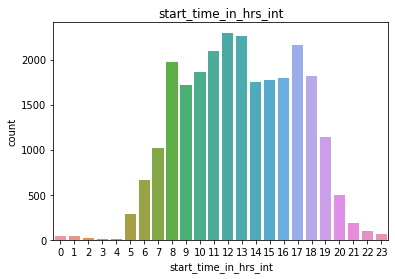

start_time_in_hrs_int

start_time_in_hrs_int
0       38
1       44
2       19
3        5
4       12
5      292
6      668
7     1021
8     1975
9     1713
10    1860
11    2096
12    2296
13    2263
14    1752
15    1770
16    1796
17    2159
18    1817
19    1141
20     494
21     188
22      96
23      61
dtype: int64


In [579]:
ax = sns.countplot(x=df_selective.start_time_in_hrs_int, data=df_selective)
ax.set_title("start_time_in_hrs_int")
plt.show()
print("start_time_in_hrs_int\n")
print(df_selective.groupby(['start_time_in_hrs_int']).size())

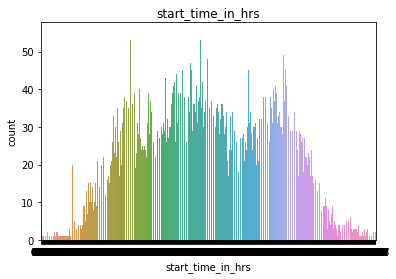

start_time_in_hrs

start_time_in_hrs
0.02     1
0.05     1
0.07     1
0.12     1
0.18     1
        ..
23.72    1
23.83    2
23.87    3
23.88    1
23.97    2
Length: 1178, dtype: int64


In [580]:
ax = sns.countplot(x=df_selective.start_time_in_hrs, data=df_selective)
ax.set_title("start_time_in_hrs")
plt.show()
print("start_time_in_hrs\n")
print(df_selective.groupby(['start_time_in_hrs']).size())

In [581]:
df_with_charge_duration_greater_than_60min = df_selective[df_selective['charge_duration_in_minutes'] >=60]

In [582]:
df_selective

,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute
0,1,6.504,17:49:00,1069,17.82,17,18.0,19:52:00,1192,19.87,19,123.0,2.05,0.0529
1,2,2.481,08:52:00,532,8.87,8,9.0,09:16:00,556,9.27,9,24.0,0.40,0.1034
2,3,15.046,21:11:00,1271,21.18,21,21.0,06:23:00,383,6.38,6,552.0,9.20,0.0273
3,4,6.947,09:19:00,559,9.32,9,9.0,11:14:00,674,11.23,11,115.0,1.92,0.0604
4,5,1.800,14:13:00,853,14.22,14,14.0,14:30:00,870,14.50,14,17.0,0.28,0.1059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25572,25573,4.460,11:06:00,666,11.10,11,11.0,11:51:00,711,11.85,11,45.0,0.75,0.0991
25573,25574,15.173,11:31:00,691,11.52,11,12.0,14:00:00,840,14.00,14,149.0,2.48,0.1018
25574,25575,14.896,11:31:00,691,11.52,11,12.0,13:47:00,827,13.78,13,136.0,2.27,0.1095
25575,25576,5.914,11:55:00,715,11.92,11,12.0,13:42:00,822,13.70,13,107.0,1.78,0.0553


In [583]:
df_selective['Start_time_string']=df_selective['Start_time'].astype('str') 

In [584]:
df_selective.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25576 entries, 0 to 25576
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ObjectId                    25576 non-null  int64  
 1   Energy__kWh_                25576 non-null  float64
 2   Start_time                  25576 non-null  object 
 3   start_time_in_minutes       25576 non-null  int64  
 4   start_time_in_hrs           25576 non-null  float64
 5   start_time_in_hrs_int       25576 non-null  int32  
 6   start_time_in_hrs_round_0   25576 non-null  float64
 7   End_time                    25576 non-null  object 
 8   end_time_in_minutes         25576 non-null  int64  
 9   end_time_in_hrs             25576 non-null  float64
 10  end_time_in_hrs_int         25576 non-null  int32  
 11  charge_duration_in_minutes  25576 non-null  float64
 12  charge_duration_in_hours    25576 non-null  float64
 13  Energy__kWh_per_minute      253

In [585]:
df_selective['total_minutes_charged_in_1hour_from_start_time']=df_selective['Start_time_string'].str.rsplit(":", n=3, expand=True)[1]

df_selective['start_time_hour']=df_selective['Start_time_string'].str.rsplit(":", n=3, expand=True)[0]


In [586]:
df_selective['total_minutes_charged_in_1hour_from_start_time_int']=df_selective['total_minutes_charged_in_1hour_from_start_time'].astype(int)

df_selective['start_time_hour_int']=df_selective['start_time_hour'].astype(int)

In [587]:
df_selective['energy_from_start_time_till_end_of_hour_span']=df_selective['Energy__kWh_per_minute']*df_selective['total_minutes_charged_in_1hour_from_start_time_int']

In [588]:
df_selective.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25576 entries, 0 to 25576
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ObjectId                                            25576 non-null  int64  
 1   Energy__kWh_                                        25576 non-null  float64
 2   Start_time                                          25576 non-null  object 
 3   start_time_in_minutes                               25576 non-null  int64  
 4   start_time_in_hrs                                   25576 non-null  float64
 5   start_time_in_hrs_int                               25576 non-null  int32  
 6   start_time_in_hrs_round_0                           25576 non-null  float64
 7   End_time                                            25576 non-null  object 
 8   end_time_in_minutes                                 25576 non-null  int64  


All Records with charging between 12_to_13: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
7,8,8.165,12:21:00,741,12.35,12,12.0,13:46:00,826,13.77,13,85.0,1.42,0.0961,12:21:00,21,12,21,12,2.0181
35,36,3.203,12:29:00,749,12.48,12,12.0,13:00:00,780,13.00,13,31.0,0.52,0.1033,12:29:00,29,12,29,12,2.9957
36,37,5.735,12:58:00,778,12.97,12,13.0,13:51:00,831,13.85,13,53.0,0.88,0.1082,12:58:00,58,12,58,12,6.2756
60,61,6.899,12:53:00,773,12.88,12,13.0,14:47:00,887,14.78,14,114.0,1.90,0.0605,12:53:00,53,12,53,12,3.2065
67,68,5.728,12:40:00,760,12.67,12,13.0,15:28:00,928,15.47,15,168.0,2.80,0.0341,12:40:00,40,12,40,12,1.3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25546,25547,19.795,12:36:00,756,12.60,12,13.0,15:28:00,928,15.47,15,172.0,2.87,0.1151,12:36:00,36,12,36,12,4.1436
25547,25548,4.495,12:40:00,760,12.67,12,13.0,13:26:00,806,13.43,13,46.0,0.77,0.0977,12:40:00,40,12,40,12,3.9080
25548,25549,14.315,12:55:00,775,12.92,12,13.0,15:26:00,926,15.43,15,151.0,2.52,0.0948,12:55:00,55,12,55,12,5.2140
25549,25550,1.302,12:56:00,776,12.93,12,13.0,13:20:00,800,13.33,13,24.0,0.40,0.0542,12:56:00,56,12,56,12,3.0352


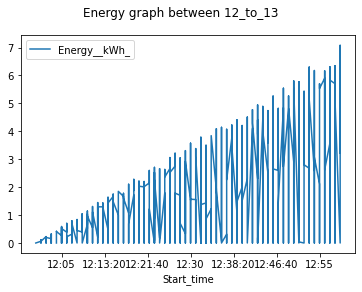

In [589]:
# for 12_to_13



import pylab as pl


# gathering all records for start time between 12_to_13
df_12_to_13=df_selective[df_selective['start_time_hour_int'] ==12]


# plot for all columns with charge START TIME FROM 12_to_13
df_12_to_13.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 12_to_13 ")

print("All Records with charging between 12_to_13: ")

# check all records between 12_to_13
df_12_to_13

All Records with charging between 13_to_14: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
8,9,14.109,13:36:00,816,13.60,13,14.0,17:55:00,1075,17.92,17,259.0,4.32,0.0545,13:36:00,36,13,36,13,1.9620
37,38,0.662,13:03:00,783,13.05,13,13.0,13:19:00,799,13.32,13,16.0,0.27,0.0414,13:03:00,03,13,3,13,0.1242
38,39,4.913,13:55:00,835,13.92,13,14.0,15:14:00,914,15.23,15,79.0,1.32,0.0622,13:55:00,55,13,55,13,3.4210
53,54,0.000,13:55:00,835,13.92,13,14.0,13:57:00,837,13.95,13,2.0,0.03,0.0000,13:55:00,55,13,55,13,0.0000
68,69,2.876,13:24:00,804,13.40,13,13.0,14:34:00,874,14.57,14,70.0,1.17,0.0411,13:24:00,24,13,24,13,0.9864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25526,25527,12.419,13:41:00,821,13.68,13,14.0,16:04:00,964,16.07,16,143.0,2.38,0.0868,13:41:00,41,13,41,13,3.5588
25527,25528,4.402,13:42:00,822,13.70,13,14.0,14:29:00,869,14.48,14,47.0,0.78,0.0937,13:42:00,42,13,42,13,3.9354
25528,25529,10.478,13:43:00,823,13.72,13,14.0,15:30:00,930,15.50,15,107.0,1.78,0.0979,13:43:00,43,13,43,13,4.2097
25550,25551,12.540,13:21:00,801,13.35,13,13.0,15:26:00,926,15.43,15,125.0,2.08,0.1003,13:21:00,21,13,21,13,2.1063


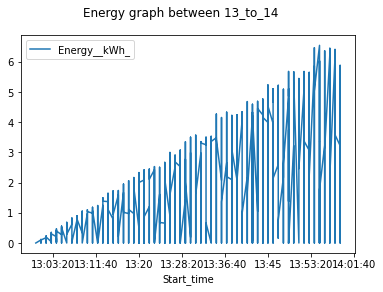

In [590]:
# for 13_to_14



import pylab as pl


# gathering all records for start time between 13_to_14
df_13_to_14=df_selective[df_selective['start_time_hour_int'] ==13]


# plot for all columns with charge START TIME FROM 12_to_13
df_13_to_14.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 13_to_14 ")

print("All Records with charging between 13_to_14: ")

# check all records between 13_to_14
df_13_to_14

All Records with charging between 14_to_15: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
4,5,1.800,14:13:00,853,14.22,14,14.0,14:30:00,870,14.50,14,17.0,0.28,0.1059,14:13:00,13,14,13,14,1.3767
5,6,2.480,14:37:00,877,14.62,14,15.0,15:01:00,901,15.02,15,24.0,0.40,0.1033,14:37:00,37,14,37,14,3.8221
12,13,0.653,14:00:00,840,14.00,14,14.0,14:24:00,864,14.40,14,24.0,0.40,0.0272,14:00:00,00,14,0,14,0.0000
18,19,11.134,14:55:00,895,14.92,14,15.0,17:09:00,1029,17.15,17,134.0,2.23,0.0831,14:55:00,55,14,55,14,4.5705
22,23,13.939,14:23:00,863,14.38,14,14.0,16:56:00,1016,16.93,16,153.0,2.55,0.0911,14:23:00,23,14,23,14,2.0953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25468,25469,10.177,14:19:00,859,14.32,14,14.0,18:14:00,1094,18.23,18,235.0,3.92,0.0433,14:19:00,19,14,19,14,0.8227
25469,25470,0.192,14:22:00,862,14.37,14,14.0,15:34:00,934,15.57,15,72.0,1.20,0.0027,14:22:00,22,14,22,14,0.0594
25470,25471,2.321,14:51:00,891,14.85,14,15.0,15:31:00,931,15.52,15,40.0,0.67,0.0580,14:51:00,51,14,51,14,2.9580
25529,25530,5.007,14:27:00,867,14.45,14,14.0,15:19:00,919,15.32,15,52.0,0.87,0.0963,14:27:00,27,14,27,14,2.6001


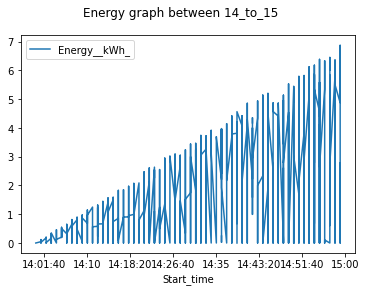

In [591]:
# for 14_to_15



import pylab as pl


# gathering all records for start time between 14_to_15
df_14_to_15=df_selective[df_selective['start_time_hour_int'] ==14]


# plot for all columns with charge START TIME FROM 14_to_15
df_14_to_15.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 14_to_15 ")

print("All Records with charging between 14_to_15: ")

# check all records between 14_to_15
df_14_to_15

All Records with charging between 15_to_16: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
32,33,3.323,15:23:00,923,15.38,15,15.0,16:19:00,979,16.32,16,56.0,0.93,0.0593,15:23:00,23,15,23,15,1.3639
40,41,10.348,15:32:00,932,15.53,15,16.0,17:16:00,1036,17.27,17,104.0,1.73,0.0995,15:32:00,32,15,32,15,3.1840
46,47,0.000,15:02:00,902,15.03,15,15.0,15:04:00,904,15.07,15,2.0,0.03,0.0000,15:02:00,02,15,2,15,0.0000
47,48,2.524,15:05:00,905,15.08,15,15.0,15:47:00,947,15.78,15,42.0,0.70,0.0601,15:05:00,05,15,5,15,0.3005
62,63,9.680,15:23:00,923,15.38,15,15.0,18:48:00,1128,18.80,18,205.0,3.42,0.0472,15:23:00,23,15,23,15,1.0856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25530,25531,4.815,15:43:00,943,15.72,15,16.0,16:35:00,995,16.58,16,52.0,0.87,0.0926,15:43:00,43,15,43,15,3.9818
25553,25554,3.841,15:16:00,916,15.27,15,15.0,17:21:00,1041,17.35,17,125.0,2.08,0.0307,15:16:00,16,15,16,15,0.4912
25554,25555,0.934,15:43:00,943,15.72,15,16.0,15:54:00,954,15.90,15,11.0,0.18,0.0849,15:43:00,43,15,43,15,3.6507
25555,25556,0.021,15:52:00,952,15.87,15,16.0,15:53:00,953,15.88,15,1.0,0.02,0.0210,15:52:00,52,15,52,15,1.0920


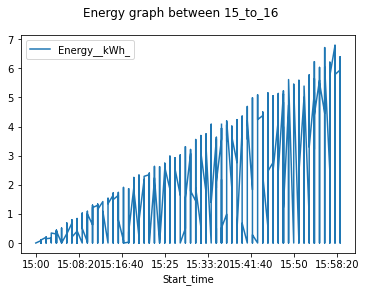

In [592]:
# for 15_to_16



import pylab as pl


# gathering all records for start time between 15_to_16
df_15_to_16=df_selective[df_selective['start_time_hour_int'] ==15]


# plot for all columns with charge START TIME FROM 14_to_15
df_15_to_16.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 15_to_16 ")

print("All Records with charging between 15_to_16: ")

# check all records between 15_to_16
df_15_to_16

All Records with charging between 16_to_17: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
9,10,2.811,16:01:00,961,16.02,16,16.0,16:48:00,1008,16.80,16,47.0,0.78,0.0598,16:01:00,01,16,1,16,0.0598
13,14,2.303,16:24:00,984,16.40,16,16.0,17:02:00,1022,17.03,17,38.0,0.63,0.0606,16:24:00,24,16,24,16,1.4544
19,20,1.855,16:23:00,983,16.38,16,16.0,16:54:00,1014,16.90,16,31.0,0.52,0.0598,16:23:00,23,16,23,16,1.3754
23,24,5.244,16:02:00,962,16.03,16,16.0,17:14:00,1034,17.23,17,72.0,1.20,0.0728,16:02:00,02,16,2,16,0.1456
48,49,6.448,16:10:00,970,16.17,16,16.0,17:14:00,1034,17.23,17,64.0,1.07,0.1008,16:10:00,10,16,10,16,1.0080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25531,25532,60.866,16:07:00,967,16.12,16,16.0,08:31:00,511,8.52,8,984.0,16.40,0.0619,16:07:00,07,16,7,16,0.4333
25532,25533,1.953,16:27:00,987,16.45,16,16.0,17:14:00,1034,17.23,17,47.0,0.78,0.0416,16:27:00,27,16,27,16,1.1232
25533,25534,4.807,16:34:00,994,16.57,16,17.0,18:59:00,1139,18.98,18,145.0,2.42,0.0332,16:34:00,34,16,34,16,1.1288
25534,25535,2.037,16:50:00,1010,16.83,16,17.0,17:08:00,1028,17.13,17,18.0,0.30,0.1132,16:50:00,50,16,50,16,5.6600


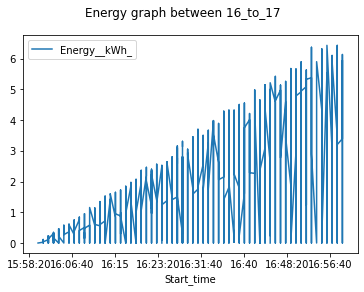

In [593]:
# for 16_to_17



import pylab as pl


# gathering all records for start time between 16_to_17
df_16_to_17=df_selective[df_selective['start_time_hour_int'] ==16]


# plot for all columns with charge START TIME FROM 16_to_17
df_16_to_17.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 16_to_17 ")

print("All Records with charging between 16_to_17: ")

# check all records between 16_to_17
df_16_to_17

All Records with charging between 17_to_18: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
0,1,6.504,17:49:00,1069,17.82,17,18.0,19:52:00,1192,19.87,19,123.0,2.05,0.0529,17:49:00,49,17,49,17,2.5921
57,58,19.976,17:27:00,1047,17.45,17,17.0,07:41:00,461,7.68,7,854.0,14.23,0.0234,17:27:00,27,17,27,17,0.6318
70,71,24.887,17:20:00,1040,17.33,17,17.0,20:58:00,1258,20.97,20,218.0,3.63,0.1142,17:20:00,20,17,20,17,2.2840
71,72,8.472,17:34:00,1054,17.57,17,18.0,18:59:00,1139,18.98,18,85.0,1.42,0.0997,17:34:00,34,17,34,17,3.3898
72,73,7.710,17:51:00,1071,17.85,17,18.0,19:09:00,1149,19.15,19,78.0,1.30,0.0988,17:51:00,51,17,51,17,5.0388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25501,25502,0.000,17:45:00,1065,17.75,17,18.0,19:47:00,1187,19.78,19,122.0,2.03,0.0000,17:45:00,45,17,45,17,0.0000
25503,25504,6.301,17:55:00,1075,17.92,17,18.0,19:49:00,1189,19.82,19,114.0,1.90,0.0553,17:55:00,55,17,55,17,3.0415
25535,25536,4.869,17:59:00,1079,17.98,17,18.0,19:31:00,1171,19.52,19,92.0,1.53,0.0529,17:59:00,59,17,59,17,3.1211
25558,25559,13.040,17:07:00,1027,17.12,17,17.0,19:17:00,1157,19.28,19,130.0,2.17,0.1003,17:07:00,07,17,7,17,0.7021


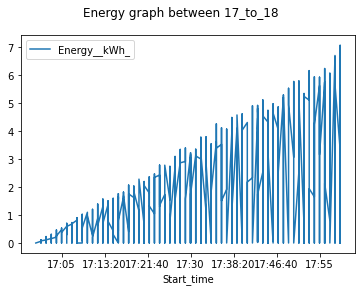

In [594]:
# for 17_to_18



import pylab as pl


# gathering all records for start time between 17_to_18
df_17_to_18=df_selective[df_selective['start_time_hour_int'] ==17]


# plot for all columns with charge START TIME FROM 17_to_18
df_17_to_18.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 17_to_18 ")

print("All Records with charging between 17_to_18: ")

# check all records between 17_to_18
df_17_to_18

All Records with charging between 18_to_19: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
99,100,8.868,18:04:00,1084,18.07,18,18.0,19:26:00,1166,19.43,19,82.0,1.37,0.1081,18:04:00,04,18,4,18,0.4324
133,134,6.702,18:24:00,1104,18.40,18,18.0,19:30:00,1170,19.50,19,66.0,1.10,0.1015,18:24:00,24,18,24,18,2.4360
184,185,0.000,18:58:00,1138,18.97,18,19.0,19:00:00,1140,19.00,19,2.0,0.03,0.0000,18:58:00,58,18,58,18,0.0000
202,203,3.094,18:59:00,1139,18.98,18,19.0,19:31:00,1171,19.52,19,32.0,0.53,0.0967,18:59:00,59,18,59,18,5.7053
265,266,4.356,18:41:00,1121,18.68,18,19.0,20:29:00,1229,20.48,20,108.0,1.80,0.0403,18:41:00,41,18,41,18,1.6523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25537,25538,0.504,18:19:00,1099,18.32,18,18.0,18:28:00,1108,18.47,18,9.0,0.15,0.0560,18:19:00,19,18,19,18,1.0640
25538,25539,8.480,18:30:00,1110,18.50,18,18.0,19:57:00,1197,19.95,19,87.0,1.45,0.0975,18:30:00,30,18,30,18,2.9250
25539,25540,8.728,18:43:00,1123,18.72,18,19.0,20:11:00,1211,20.18,20,88.0,1.47,0.0992,18:43:00,43,18,43,18,4.2656
25560,25561,0.800,18:04:00,1084,18.07,18,18.0,18:22:00,1102,18.37,18,18.0,0.30,0.0444,18:04:00,04,18,4,18,0.1776


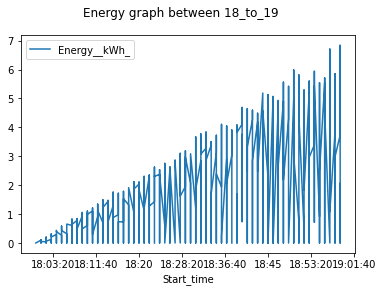

In [595]:
# for 18_to_19



import pylab as pl


# gathering all records for start time between 18_to_19
df_18_to_19=df_selective[df_selective['start_time_hour_int'] ==18]


# plot for all columns with charge START TIME FROM 18_to_19
df_18_to_19.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 18_to_19 ")

print("All Records with charging between 18_to_19: ")

# check all records between 18_to_19
df_18_to_19

All Records with charging between 19_to_20: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
140,141,0.061,19:01:00,1141,19.02,19,19.0,19:02:00,1142,19.03,19,1.0,0.02,0.0610,19:01:00,01,19,1,19,0.0610
141,142,10.544,19:11:00,1151,19.18,19,19.0,05:45:00,345,5.75,5,634.0,10.57,0.0166,19:11:00,11,19,11,19,0.1826
193,194,15.456,19:05:00,1145,19.08,19,19.0,06:54:00,414,6.90,6,709.0,11.82,0.0218,19:05:00,05,19,5,19,0.1090
204,205,9.846,19:09:00,1149,19.15,19,19.0,20:47:00,1247,20.78,20,98.0,1.63,0.1005,19:09:00,09,19,9,19,0.9045
300,301,4.674,19:49:00,1189,19.82,19,20.0,21:20:00,1280,21.33,21,91.0,1.52,0.0514,19:49:00,49,19,49,19,2.5186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25421,25422,2.727,19:12:00,1152,19.20,19,19.0,20:02:00,1202,20.03,20,50.0,0.83,0.0545,19:12:00,12,19,12,19,0.6540
25422,25423,2.002,19:33:00,1173,19.55,19,20.0,20:11:00,1211,20.18,20,38.0,0.63,0.0527,19:33:00,33,19,33,19,1.7391
25481,25482,11.073,19:50:00,1190,19.83,19,20.0,21:46:00,1306,21.77,21,116.0,1.93,0.0955,19:50:00,50,19,50,19,4.7750
25540,25541,3.210,19:31:00,1171,19.52,19,20.0,21:15:00,1275,21.25,21,104.0,1.73,0.0309,19:31:00,31,19,31,19,0.9579


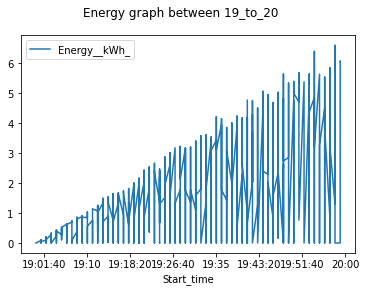

In [596]:
# for 19_to_20



import pylab as pl


# gathering all records for start time between 19_to_20
df_19_to_20=df_selective[df_selective['start_time_hour_int'] ==19]


# plot for all columns with charge START TIME FROM 19_to_20
df_19_to_20.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 19_to_20 ")

print("All Records with charging between 19_to_20: ")

# check all records between 19_to_20
df_19_to_20

All Records with charging between 20_to_21: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
10,11,16.744,20:16:00,1216,20.27,20,20.0,07:24:00,444,7.40,7,668.0,11.13,0.0251,20:16:00,16,20,16,20,0.4016
55,56,8.738,20:21:00,1221,20.35,20,20.0,08:06:00,486,8.10,8,705.0,11.75,0.0124,20:21:00,21,20,21,20,0.2604
74,75,11.412,20:48:00,1248,20.80,20,21.0,09:09:00,549,9.15,9,741.0,12.35,0.0154,20:48:00,48,20,48,20,0.7392
117,118,4.057,20:07:00,1207,20.12,20,20.0,21:15:00,1275,21.25,21,68.0,1.13,0.0597,20:07:00,07,20,7,20,0.4179
134,135,11.213,20:35:00,1235,20.58,20,21.0,22:27:00,1347,22.45,22,112.0,1.87,0.1001,20:35:00,35,20,35,20,3.5035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25344,25345,5.232,20:39:00,1239,20.65,20,21.0,21:33:00,1293,21.55,21,54.0,0.90,0.0969,20:39:00,39,20,39,20,3.7791
25482,25483,10.340,20:12:00,1212,20.20,20,20.0,21:55:00,1315,21.92,21,103.0,1.72,0.1004,20:12:00,12,20,12,20,1.2048
25483,25484,32.318,20:44:00,1244,20.73,20,21.0,08:49:00,529,8.82,8,725.0,12.08,0.0446,20:44:00,44,20,44,20,1.9624
25511,25512,0.000,20:05:00,1205,20.08,20,20.0,20:07:00,1207,20.12,20,2.0,0.03,0.0000,20:05:00,05,20,5,20,0.0000


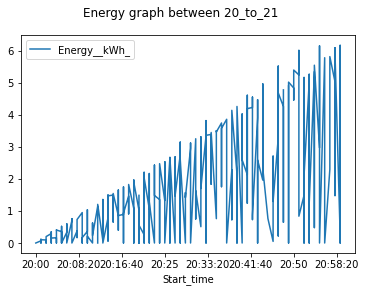

In [597]:
# for 20_to_21



import pylab as pl


# gathering all records for start time between 20_to_21
df_20_to_21=df_selective[df_selective['start_time_hour_int'] ==20]


# plot for all columns with charge START TIME FROM 20_to_21
df_20_to_21.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 20_to_21 ")

print("All Records with charging between 20_to_21: ")

# check all records between 20_to_21
df_20_to_21

All Records with charging between 21_to_22: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
2,3,15.046,21:11:00,1271,21.18,21,21.0,06:23:00,383,6.38,6,552.0,9.20,0.0273,21:11:00,11,21,11,21,0.3003
11,12,3.476,21:11:00,1271,21.18,21,21.0,21:52:00,1312,21.87,21,41.0,0.68,0.0848,21:11:00,11,21,11,21,0.9328
84,85,17.053,21:00:00,1260,21.00,21,21.0,07:50:00,470,7.83,7,650.0,10.83,0.0262,21:00:00,00,21,0,21,0.0000
231,232,1.371,21:03:00,1263,21.05,21,21.0,21:17:00,1277,21.28,21,14.0,0.23,0.0979,21:03:00,03,21,3,21,0.2937
301,302,0.000,21:21:00,1281,21.35,21,21.0,21:23:00,1283,21.38,21,2.0,0.03,0.0000,21:21:00,21,21,21,21,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25328,25329,13.475,21:05:00,1265,21.08,21,21.0,23:13:00,1393,23.22,23,128.0,2.13,0.1053,21:05:00,05,21,5,21,0.5265
25343,25344,0.641,21:08:00,1268,21.13,21,21.0,21:15:00,1275,21.25,21,7.0,0.12,0.0916,21:08:00,08,21,8,21,0.7328
25349,25350,35.220,21:22:00,1282,21.37,21,21.0,06:53:00,413,6.88,6,571.0,9.52,0.0617,21:22:00,22,21,22,21,1.3574
25514,25515,0.000,21:20:00,1280,21.33,21,21.0,21:22:00,1282,21.37,21,2.0,0.03,0.0000,21:20:00,20,21,20,21,0.0000


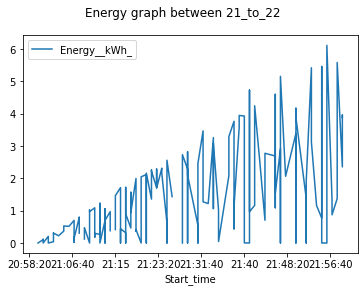

In [598]:
# for 21_to_22



import pylab as pl


# gathering all records for start time between 21_to_22
df_21_to_22=df_selective[df_selective['start_time_hour_int'] ==21]


# plot for all columns with charge START TIME FROM 21_to_22
df_21_to_22.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 21_to_22 ")

print("All Records with charging between 21_to_22: ")

# check all records between 21_to_22
df_21_to_22

All Records with charging between 22_to_23: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
108,109,7.399,22:12:00,1332,22.20,22,22.0,00:12:00,12,0.20,0,120.0,2.00,0.0617,22:12:00,12,22,12,22,0.7404
310,311,18.079,22:51:00,1371,22.85,22,23.0,07:12:00,432,7.20,7,501.0,8.35,0.0361,22:51:00,51,22,51,22,1.8411
548,549,3.094,22:07:00,1327,22.12,22,22.0,23:32:00,1412,23.53,23,85.0,1.42,0.0364,22:07:00,07,22,7,22,0.2548
1050,1051,4.613,22:15:00,1335,22.25,22,22.0,23:02:00,1382,23.03,23,47.0,0.78,0.0981,22:15:00,15,22,15,22,1.4715
1054,1055,18.692,22:44:00,1364,22.73,22,23.0,06:44:00,404,6.73,6,480.0,8.00,0.0389,22:44:00,44,22,44,22,1.7116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25399,25400,61.445,22:01:00,1321,22.02,22,22.0,13:42:00,822,13.70,13,941.0,15.68,0.0653,22:01:00,01,22,1,22,0.0653
25541,25542,0.000,22:12:00,1332,22.20,22,22.0,22:14:00,1334,22.23,22,2.0,0.03,0.0000,22:12:00,12,22,12,22,0.0000
25542,25543,13.169,22:13:00,1333,22.22,22,22.0,07:08:00,428,7.13,7,535.0,8.92,0.0246,22:13:00,13,22,13,22,0.3198
25563,25564,0.000,22:10:00,1330,22.17,22,22.0,22:12:00,1332,22.20,22,2.0,0.03,0.0000,22:10:00,10,22,10,22,0.0000


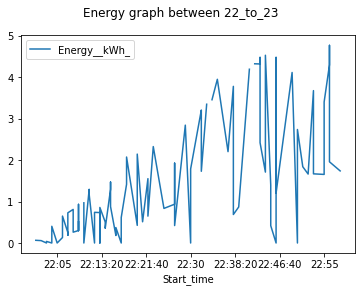

In [599]:
# for 22_to_23



import pylab as pl


# gathering all records for start time between 22_to_23
df_22_to_23=df_selective[df_selective['start_time_hour_int'] ==22]


# plot for all columns with charge START TIME FROM 22_to_23
df_22_to_23.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 22_to_23 ")

print("All Records with charging between 22_to_23: ")

# check all records between 22_to_23
df_22_to_23

All Records with charging between 23_to_24: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
557,558,11.104,23:32:00,1412,23.53,23,24.0,01:21:00,81,1.35,1,109.0,1.82,0.1019,23:32:00,32,23,32,23,3.2608
609,610,1.457,23:53:00,1433,23.88,23,24.0,00:08:00,8,0.13,0,15.0,0.25,0.0971,23:53:00,53,23,53,23,5.1463
1062,1063,6.253,23:41:00,1421,23.68,23,24.0,01:35:00,95,1.58,1,114.0,1.90,0.0549,23:41:00,41,23,41,23,2.2509
1167,1168,10.538,23:25:00,1405,23.42,23,23.0,08:44:00,524,8.73,8,559.0,9.32,0.0189,23:25:00,25,23,25,23,0.4725
1181,1182,15.717,23:11:00,1391,23.18,23,23.0,07:23:00,443,7.38,7,492.0,8.20,0.0319,23:11:00,11,23,11,23,0.3509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18285,18286,16.484,23:18:00,1398,23.30,23,23.0,05:48:00,348,5.80,5,390.0,6.50,0.0423,23:18:00,18,23,18,23,0.7614
18321,18322,12.089,23:10:00,1390,23.17,23,23.0,05:55:00,355,5.92,5,405.0,6.75,0.0298,23:10:00,10,23,10,23,0.2980
22206,22207,4.314,23:30:00,1410,23.50,23,24.0,00:15:00,15,0.25,0,45.0,0.75,0.0959,23:30:00,30,23,30,23,2.8770
22347,22348,14.684,23:33:00,1413,23.55,23,24.0,02:04:00,124,2.07,2,151.0,2.52,0.0972,23:33:00,33,23,33,23,3.2076


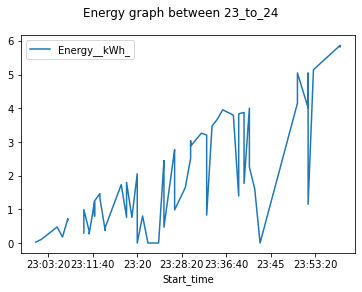

In [600]:
# for 23_to_24



import pylab as pl


# gathering all records for start time between 23_to_24
df_23_to_24=df_selective[df_selective['start_time_hour_int'] ==23]


# plot for all columns with charge START TIME FROM 23_to_24
df_23_to_24.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 23_to_24 ")

print("All Records with charging between 23_to_24: ")

# check all records between 23_to_24
df_23_to_24

All Records with charging between 0_to_1: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
522,523,0.000,00:57:00,57,0.95,0,1.0,00:59:00,59,0.98,0,2.0,0.03,0.0000,00:57:00,57,00,57,0,0.0000
1955,1956,33.301,00:43:00,43,0.72,0,1.0,10:02:00,602,10.03,10,559.0,9.32,0.0596,00:43:00,43,00,43,0,2.5628
3299,3300,4.502,00:33:00,33,0.55,0,1.0,10:03:00,603,10.05,10,570.0,9.50,0.0079,00:33:00,33,00,33,0,0.2607
4439,4440,2.043,00:42:00,42,0.70,0,1.0,01:02:00,62,1.03,1,20.0,0.33,0.1022,00:42:00,42,00,42,0,4.2924
4825,4826,3.086,00:40:00,40,0.67,0,1.0,01:11:00,71,1.18,1,31.0,0.52,0.0995,00:40:00,40,00,40,0,3.9800
5193,5194,0.000,00:21:00,21,0.35,0,0.0,00:22:00,22,0.37,0,1.0,0.02,0.0000,00:21:00,21,00,21,0,0.0000
5480,5481,0.962,00:53:00,53,0.88,0,1.0,01:03:00,63,1.05,1,10.0,0.17,0.0962,00:53:00,53,00,53,0,5.0986
5574,5575,2.495,00:50:00,50,0.83,0,1.0,01:16:00,76,1.27,1,26.0,0.43,0.0960,00:50:00,50,00,50,0,4.8000
6118,6119,2.175,00:24:00,24,0.40,0,0.0,00:45:00,45,0.75,0,21.0,0.35,0.1036,00:24:00,24,00,24,0,2.4864
6210,6211,0.000,00:45:00,45,0.75,0,1.0,00:47:00,47,0.78,0,2.0,0.03,0.0000,00:45:00,45,00,45,0,0.0000


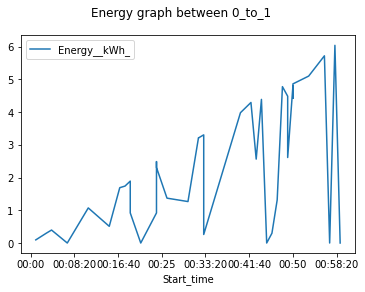

In [601]:
# for 0_to_1



import pylab as pl


# gathering all records for start time between 0_to_1
df_0_to_1=df_selective[df_selective['start_time_hour_int'] ==0]


# plot for all columns with charge START TIME FROM 0_to_1
df_0_to_1.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 0_to_1 ")

print("All Records with charging between 0_to_1: ")

# check all records between 0_to_1
df_0_to_1

All Records with charging between 1_to_2: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
523,524,6.083,01:18:00,78,1.30,1,1.0,02:20:00,140,2.33,2,62.0,1.03,0.0981,01:18:00,18,01,18,1,1.7658
1195,1196,4.187,01:30:00,90,1.50,1,2.0,06:19:00,379,6.32,6,289.0,4.82,0.0145,01:30:00,30,01,30,1,0.4350
1354,1355,1.610,01:15:00,75,1.25,1,1.0,01:58:00,118,1.97,1,43.0,0.72,0.0374,01:15:00,15,01,15,1,0.5610
2946,2947,1.699,01:19:00,79,1.32,1,1.0,01:36:00,96,1.60,1,17.0,0.28,0.0999,01:19:00,19,01,19,1,1.8981
4326,4327,1.563,01:58:00,118,1.97,1,2.0,02:14:00,134,2.23,2,16.0,0.27,0.0977,01:58:00,58,01,58,1,5.6666
4440,4441,1.392,01:36:00,96,1.60,1,2.0,01:50:00,110,1.83,1,14.0,0.23,0.0994,01:36:00,36,01,36,1,3.5784
4468,4469,1.586,01:14:00,74,1.23,1,1.0,01:48:00,108,1.80,1,34.0,0.57,0.0466,01:14:00,14,01,14,1,0.6524
4702,4703,2.438,01:48:00,108,1.80,1,2.0,02:12:00,132,2.20,2,24.0,0.40,0.1016,01:48:00,48,01,48,1,4.8768
4736,4737,2.428,01:39:00,99,1.65,1,2.0,02:04:00,124,2.07,2,25.0,0.42,0.0971,01:39:00,39,01,39,1,3.7869
4866,4867,1.762,01:56:00,116,1.93,1,2.0,02:14:00,134,2.23,2,18.0,0.30,0.0979,01:56:00,56,01,56,1,5.4824


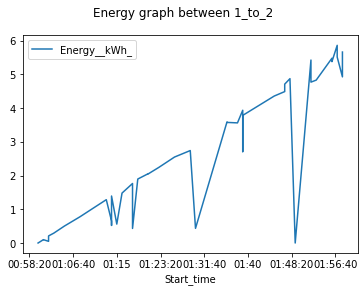

In [602]:
# for 1_to_2



import pylab as pl


# gathering all records for start time between 1_to_2
df_1_to_2=df_selective[df_selective['start_time_hour_int'] ==1]


# plot for all columns with charge START TIME FROM 1_to_2
df_1_to_2.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 1_to_2 ")

print("All Records with charging between 1_to_2: ")

# check all records between 1_to_2
df_1_to_2

All Records with charging between 2_to_3: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
1066,1067,4.215,02:00:00,120,2.00,2,2.0,08:40:00,520,8.67,8,400.0,6.67,0.0105,02:00:00,00,02,0,2,0.0000
4441,4442,4.130,02:16:00,136,2.27,2,2.0,02:58:00,178,2.97,2,42.0,0.70,0.0983,02:16:00,16,02,16,2,1.5728
5036,5037,1.521,02:01:00,121,2.02,2,2.0,02:16:00,136,2.27,2,15.0,0.25,0.1014,02:01:00,01,02,1,2,0.1014
5195,5196,0.020,02:37:00,157,2.62,2,3.0,03:16:00,196,3.27,3,39.0,0.65,0.0005,02:37:00,37,02,37,2,0.0185
5347,5348,2.126,02:20:00,140,2.33,2,2.0,02:41:00,161,2.68,2,21.0,0.35,0.1012,02:20:00,20,02,20,2,2.0240
5733,5734,3.529,02:10:00,130,2.17,2,2.0,02:45:00,165,2.75,2,35.0,0.58,0.1008,02:10:00,10,02,10,2,1.0080
6513,6514,2.742,02:07:00,127,2.12,2,2.0,02:33:00,153,2.55,2,26.0,0.43,0.1055,02:07:00,07,02,7,2,0.7385
7399,7400,1.109,02:30:00,150,2.50,2,2.0,02:42:00,162,2.70,2,12.0,0.20,0.0924,02:30:00,30,02,30,2,2.7720
7471,7472,4.627,02:38:00,158,2.63,2,3.0,03:24:00,204,3.40,3,46.0,0.77,0.1006,02:38:00,38,02,38,2,3.8228
8591,8592,1.843,02:19:00,139,2.32,2,2.0,02:37:00,157,2.62,2,18.0,0.30,0.1024,02:19:00,19,02,19,2,1.9456


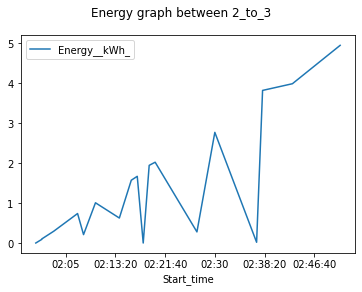

In [603]:
# for 2_to_3



import pylab as pl


# gathering all records for start time between 2_to_3
df_2_to_3=df_selective[df_selective['start_time_hour_int'] ==2]


# plot for all columns with charge START TIME FROM 2_to_3
df_2_to_3.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 2_to_3 ")

print("All Records with charging between 2_to_3: ")

# check all records between 2_to_3
df_2_to_3

All Records with charging between 3_to_4: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
1927,1928,16.368,03:59:00,239,3.98,3,4.0,07:07:00,427,7.12,7,188.0,3.13,0.0871,03:59:00,59,03,59,3,5.1389
4329,4330,11.839,03:43:00,223,3.72,3,4.0,06:29:00,389,6.48,6,166.0,2.77,0.0713,03:43:00,43,03,43,3,3.0659
6752,6753,7.993,03:19:00,199,3.32,3,3.0,04:37:00,277,4.62,4,78.0,1.30,0.1025,03:19:00,19,03,19,3,1.9475
7192,7193,11.374,03:26:00,206,3.43,3,3.0,07:46:00,466,7.77,7,260.0,4.33,0.0437,03:26:00,26,03,26,3,1.1362
8975,8976,2.618,03:03:00,183,3.05,3,3.0,03:30:00,210,3.50,3,27.0,0.45,0.0970,03:03:00,03,03,3,3,0.2910


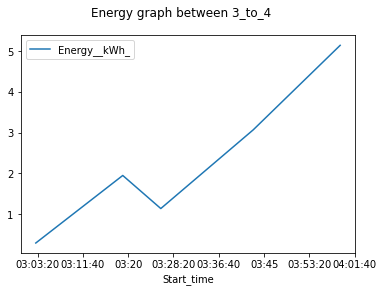

In [604]:
# for 3_to_4



import pylab as pl


# gathering all records for start time between 3_to_4
df_3_to_4=df_selective[df_selective['start_time_hour_int'] ==3]


# plot for all columns with charge START TIME FROM 3_to_4
df_3_to_4.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 3_to_4 ")

print("All Records with charging between 3_to_4: ")

# check all records between 3_to_4
df_3_to_4

All Records with charging between 4_to_5: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
1453,1454,2.414,04:48:00,288,4.80,4,5.0,07:46:00,466,7.77,7,178.0,2.97,0.0136,04:48:00,48,04,48,4,0.6528
6514,6515,16.661,04:49:00,289,4.82,4,5.0,11:24:00,684,11.40,11,395.0,6.58,0.0422,04:49:00,49,04,49,4,2.0678
6952,6953,21.480,04:17:00,257,4.28,4,4.0,07:23:00,443,7.38,7,186.0,3.10,0.1155,04:17:00,17,04,17,4,1.9635
9938,9939,0.000,04:53:00,293,4.88,4,5.0,04:55:00,295,4.92,4,2.0,0.03,0.0000,04:53:00,53,04,53,4,0.0000
11271,11272,9.710,04:56:00,296,4.93,4,5.0,07:22:00,442,7.37,7,146.0,2.43,0.0665,04:56:00,56,04,56,4,3.7240
12224,12225,7.358,04:58:00,298,4.97,4,5.0,08:01:00,481,8.02,8,183.0,3.05,0.0402,04:58:00,58,04,58,4,2.3316
13276,13277,13.857,04:56:00,296,4.93,4,5.0,07:16:00,436,7.27,7,140.0,2.33,0.0990,04:56:00,56,04,56,4,5.5440
13518,13519,13.717,04:59:00,299,4.98,4,5.0,08:24:00,504,8.40,8,205.0,3.42,0.0669,04:59:00,59,04,59,4,3.9471
15264,15265,0.955,04:44:00,284,4.73,4,5.0,05:23:00,323,5.38,5,39.0,0.65,0.0245,04:44:00,44,04,44,4,1.0780
19997,19998,43.684,04:39:00,279,4.65,4,5.0,11:41:00,701,11.68,11,422.0,7.03,0.1035,04:39:00,39,04,39,4,4.0365


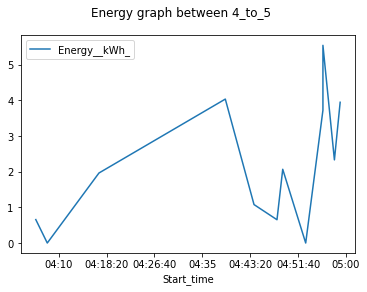

In [605]:
# for 4_to_5



import pylab as pl


# gathering all records for start time between 4_to_5
df_4_to_5=df_selective[df_selective['start_time_hour_int'] ==4]


# plot for all columns with charge START TIME FROM 4_to_5
df_4_to_5.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 4_to_5 ")

print("All Records with charging between 4_to_5: ")

# check all records between 4_to_5
df_4_to_5

All Records with charging between 5_to_6: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
238,239,6.586,05:54:00,354,5.90,5,6.0,06:55:00,415,6.92,6,61.0,1.02,0.1080,05:54:00,54,05,54,5,5.8320
570,571,0.000,05:49:00,349,5.82,5,6.0,05:50:00,350,5.83,5,1.0,0.02,0.0000,05:49:00,49,05,49,5,0.0000
755,756,3.766,05:29:00,329,5.48,5,5.0,07:19:00,439,7.32,7,110.0,1.83,0.0342,05:29:00,29,05,29,5,0.9918
899,900,11.997,05:39:00,339,5.65,5,6.0,07:22:00,442,7.37,7,103.0,1.72,0.1165,05:39:00,39,05,39,5,4.5435
1247,1248,6.661,05:55:00,355,5.92,5,6.0,07:23:00,443,7.38,7,88.0,1.47,0.0757,05:55:00,55,05,55,5,4.1635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24251,24252,9.424,05:57:00,357,5.95,5,6.0,07:24:00,444,7.40,7,87.0,1.45,0.1083,05:57:00,57,05,57,5,6.1731
24300,24301,8.747,05:57:00,357,5.95,5,6.0,07:17:00,437,7.28,7,80.0,1.33,0.1093,05:57:00,57,05,57,5,6.2301
24487,24488,6.621,05:59:00,359,5.98,5,6.0,07:05:00,425,7.08,7,66.0,1.10,0.1003,05:59:00,59,05,59,5,5.9177
24843,24844,9.040,05:58:00,358,5.97,5,6.0,07:53:00,473,7.88,7,115.0,1.92,0.0786,05:58:00,58,05,58,5,4.5588


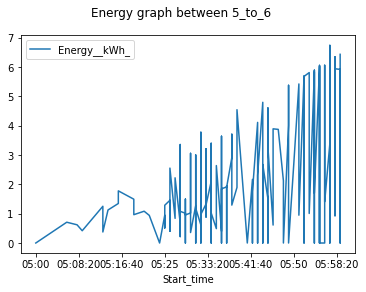

In [606]:
# for 5_to_6



import pylab as pl


# gathering all records for start time between 5_to_6
df_5_to_6=df_selective[df_selective['start_time_hour_int'] ==5]


# plot for all columns with charge START TIME FROM 5_to_6
df_5_to_6.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 5_to_6 ")

print("All Records with charging between 5_to_6: ")

# check all records between 5_to_6
df_5_to_6

All Records with charging between 6_to_7: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
118,119,3.947,06:01:00,361,6.02,6,6.0,06:38:00,398,6.63,6,37.0,0.62,0.1067,06:01:00,01,06,1,6,0.1067
119,120,5.277,06:21:00,381,6.35,6,6.0,07:28:00,448,7.47,7,67.0,1.12,0.0788,06:21:00,21,06,21,6,1.6548
120,121,7.334,06:55:00,415,6.92,6,7.0,08:10:00,490,8.17,8,75.0,1.25,0.0978,06:55:00,55,06,55,6,5.3790
159,160,12.060,06:24:00,384,6.40,6,6.0,08:15:00,495,8.25,8,111.0,1.85,0.1086,06:24:00,24,06,24,6,2.6064
168,169,4.710,06:57:00,417,6.95,6,7.0,07:43:00,463,7.72,7,46.0,0.77,0.1024,06:57:00,57,06,57,6,5.8368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25423,25424,4.707,06:21:00,381,6.35,6,6.0,09:16:00,556,9.27,9,175.0,2.92,0.0269,06:21:00,21,06,21,6,0.5649
25516,25517,8.154,06:26:00,386,6.43,6,6.0,07:36:00,456,7.60,7,70.0,1.17,0.1165,06:26:00,26,06,26,6,3.0290
25544,25545,7.967,06:15:00,375,6.25,6,6.0,07:58:00,478,7.97,7,103.0,1.72,0.0773,06:15:00,15,06,15,6,1.1595
25545,25546,3.302,06:25:00,385,6.42,6,6.0,07:35:00,455,7.58,7,70.0,1.17,0.0472,06:25:00,25,06,25,6,1.1800


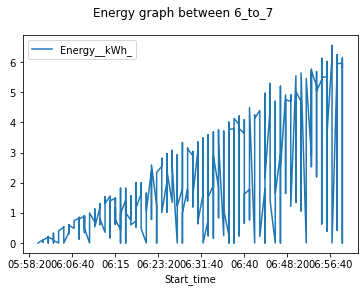

In [607]:
# for 6_to_7



import pylab as pl


# gathering all records for start time between 6_to_7
df_6_to_7=df_selective[df_selective['start_time_hour_int'] ==6]


# plot for all columns with charge START TIME FROM 6_to_7
df_6_to_7.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 6_to_7 ")

print("All Records with charging between 6_to_7: ")

# check all records between 6_to_7
df_6_to_7

All Records with charging between 7_to_8: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
14,15,4.642,07:49:00,469,7.82,7,8.0,09:12:00,552,9.20,9,83.0,1.38,0.0559,07:49:00,49,07,49,7,2.7391
50,51,4.608,07:29:00,449,7.48,7,7.0,09:22:00,562,9.37,9,113.0,1.88,0.0408,07:29:00,29,07,29,7,1.1832
109,110,7.664,07:43:00,463,7.72,7,8.0,11:14:00,674,11.23,11,211.0,3.52,0.0363,07:43:00,43,07,43,7,1.5609
169,170,17.032,07:41:00,461,7.68,7,8.0,17:12:00,1032,17.20,17,571.0,9.52,0.0298,07:41:00,41,07,41,7,1.2218
208,209,7.353,07:35:00,455,7.58,7,8.0,08:50:00,530,8.83,8,75.0,1.25,0.0980,07:35:00,35,07,35,7,3.4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25396,25397,9.168,07:41:00,461,7.68,7,8.0,09:17:00,557,9.28,9,96.0,1.60,0.0955,07:41:00,41,07,41,7,3.9155
25397,25398,0.000,07:46:00,466,7.77,7,8.0,07:48:00,468,7.80,7,2.0,0.03,0.0000,07:46:00,46,07,46,7,0.0000
25424,25425,20.201,07:47:00,467,7.78,7,8.0,11:11:00,671,11.18,11,204.0,3.40,0.0990,07:47:00,47,07,47,7,4.6530
25517,25518,22.049,07:42:00,462,7.70,7,8.0,11:31:00,691,11.52,11,229.0,3.82,0.0963,07:42:00,42,07,42,7,4.0446


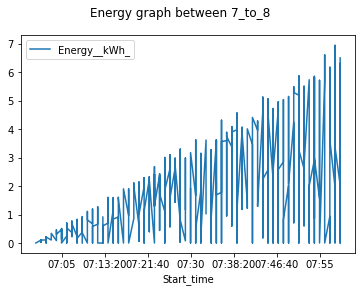

In [608]:
# for 7_to_8



import pylab as pl


# gathering all records for start time between 7_to_8
df_7_to_8=df_selective[df_selective['start_time_hour_int'] ==7]


# plot for all columns with charge START TIME FROM 7_to_8
df_7_to_8.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 7_to_8 ")

print("All Records with charging between 7_to_8: ")

# check all records between 7_to_8
df_7_to_8

All Records with charging between 8_to_9: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
1,2,2.481,08:52:00,532,8.87,8,9.0,09:16:00,556,9.27,9,24.0,0.40,0.1034,08:52:00,52,08,52,8,5.3768
15,16,4.169,08:21:00,501,8.35,8,8.0,09:29:00,569,9.48,9,68.0,1.13,0.0613,08:21:00,21,08,21,8,1.2873
26,27,3.189,08:47:00,527,8.78,8,9.0,10:26:00,626,10.43,10,99.0,1.65,0.0322,08:47:00,47,08,47,8,1.5134
41,42,16.893,08:12:00,492,8.20,8,8.0,11:37:00,697,11.62,11,1645.0,27.42,0.0103,08:12:00,12,08,12,8,0.1236
42,43,11.521,08:13:00,493,8.22,8,8.0,09:59:00,599,9.98,9,106.0,1.77,0.1087,08:13:00,13,08,13,8,1.4131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25486,25487,21.474,08:38:00,518,8.63,8,9.0,12:18:00,738,12.30,12,220.0,3.67,0.0976,08:38:00,38,08,38,8,3.7088
25487,25488,1.200,08:52:00,532,8.87,8,9.0,09:21:00,561,9.35,9,29.0,0.48,0.0414,08:52:00,52,08,52,8,2.1528
25518,25519,4.647,08:33:00,513,8.55,8,9.0,10:38:00,638,10.63,10,125.0,2.08,0.0372,08:33:00,33,08,33,8,1.2276
25567,25568,6.341,08:31:00,511,8.52,8,9.0,10:46:00,646,10.77,10,135.0,2.25,0.0470,08:31:00,31,08,31,8,1.4570


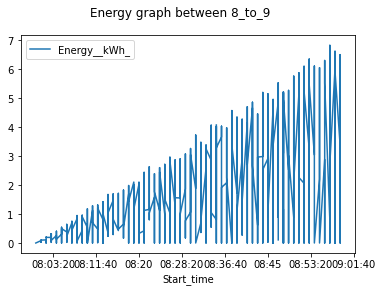

In [609]:
# for 8_to_9



import pylab as pl


# gathering all records for start time between 8_to_9
df_8_to_9=df_selective[df_selective['start_time_hour_int'] ==8]


# plot for all columns with charge START TIME FROM 8_to_9
df_8_to_9.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 8_to_9 ")

print("All Records with charging between 8_to_9: ")

# check all records between 8_to_9
df_8_to_9

In [618]:
# for 8_to_9

print("The number of records with null values in the calculated energy for one hour are: ")
print(df_8_to_9['energy_from_start_time_till_end_of_hour_span'].isnull().values.sum())
#find max energy
print("max is: ")
df_8_to_9_max_energy=df_8_to_9['energy_from_start_time_till_end_of_hour_span'].max()
print(df_8_to_9_max_energy)
#find min energy
print("min is: ")
df_8_to_9_min_energy=df_8_to_9['energy_from_start_time_till_end_of_hour_span'].min()
print(df_8_to_9_min_energy)
#find average
avg=(df_8_to_9_max_energy+df_8_to_9_min_energy)/2;
print("average is: ")
print(avg)

#fill all null values with average energy
df_8_to_9['energy_from_start_time_till_end_of_hour_span'] = df_8_to_9['energy_from_start_time_till_end_of_hour_span'].fillna(avg)

#check null values again
print("After fillig all null values with average, the total records still having null values are: ")
print(df_8_to_9['energy_from_start_time_till_end_of_hour_span'].isnull().values.sum())

#calculate total

Total_8_to_9 = df_8_to_9['energy_from_start_time_till_end_of_hour_span'].sum()
print("Total consumption between 8_to_9: ")
print(Total_8_to_9)

print("")


The number of records with null values in the calculated energy for one hour are: 
12
max is: 
6.8286
min is: 
0.0
average is: 
3.4143
After fillig all null values with average, the total records still having null values are: 
0
Total consumption between 8_to_9: 
4190.0797999999995



<ipython-input-618-22ce309ff740>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8_to_9['energy_from_start_time_till_end_of_hour_span'] = df_8_to_9['energy_from_start_time_till_end_of_hour_span'].fillna(avg)


All Records with charging between 9_to_10: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
3,4,6.947,09:19:00,559,9.32,9,9.0,11:14:00,674,11.23,11,115.0,1.92,0.0604,09:19:00,19,09,19,9,1.1476
6,7,4.443,09:29:00,569,9.48,9,9.0,08:35:00,515,8.58,8,5706.0,95.10,0.0008,09:29:00,29,09,29,9,0.0232
16,17,0.696,09:45:00,585,9.75,9,10.0,10:17:00,617,10.28,10,32.0,0.53,0.0217,09:45:00,45,09,45,9,0.9765
17,18,10.224,09:52:00,592,9.87,9,10.0,16:20:00,980,16.33,16,388.0,6.47,0.0264,09:52:00,52,09,52,9,1.3728
20,21,2.928,09:46:00,586,9.77,9,10.0,10:59:00,659,10.98,10,73.0,1.22,0.0401,09:46:00,46,09,46,9,1.8446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25450,25451,6.255,09:12:00,552,9.20,9,9.0,10:07:00,607,10.12,10,55.0,0.92,0.1137,09:12:00,12,09,12,9,1.3644
25453,25454,6.621,09:16:00,556,9.27,9,9.0,10:25:00,625,10.42,10,69.0,1.15,0.0960,09:16:00,16,09,16,9,1.5360
25456,25457,8.928,09:56:00,596,9.93,9,10.0,11:23:00,683,11.38,11,87.0,1.45,0.1026,09:56:00,56,09,56,9,5.7456
25457,25458,6.426,09:00:00,540,9.00,9,9.0,10:06:00,606,10.10,10,66.0,1.10,0.0974,09:00:00,00,09,0,9,0.0000


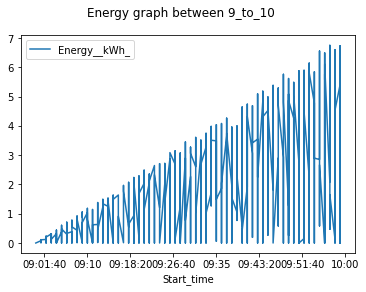

In [610]:
# for 9_to_10



import pylab as pl


# gathering all records for start time between 9_to_10
df_9_to_10=df_selective[df_selective['start_time_hour_int'] ==9]


# plot for all columns with charge START TIME FROM 9_to_10
df_9_to_10.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 9_to_10 ")

print("All Records with charging between 9_to_10: ")

# check all records between 9_to_10
df_9_to_10

In [617]:
# for 9_to_10

print("The number of records with null values in the calculated energy for one hour are: ")
print(df_9_to_10['energy_from_start_time_till_end_of_hour_span'].isnull().values.sum())
#find max energy
print("max is: ")
df_9_to_10_max_energy=df_9_to_10['energy_from_start_time_till_end_of_hour_span'].max()
print(df_9_to_10_max_energy)
#find min energy
print("min is: ")
df_9_to_10_min_energy=df_9_to_10['energy_from_start_time_till_end_of_hour_span'].min()
print(df_9_to_10_min_energy)
#find average
avg=(df_9_to_10_max_energy+df_9_to_10_min_energy)/2;
print("average is: ")
print(avg)

#fill all null values with average energy
df_9_to_10['energy_from_start_time_till_end_of_hour_span'] = df_9_to_10['energy_from_start_time_till_end_of_hour_span'].fillna(avg)

#check null values again
print("After fillig all null values with average, the total records still having null values are: ")
print(df_9_to_10['energy_from_start_time_till_end_of_hour_span'].isnull().values.sum())

#calculate total

Total_9_to_10 = df_9_to_10['energy_from_start_time_till_end_of_hour_span'].sum()
print("Total consumption between 9_to_10: ")
print(Total_9_to_10)

print("")


The number of records with null values in the calculated energy for one hour are: 
7
max is: 
6.754499999999999
min is: 
0.0
average is: 
3.3772499999999996
After fillig all null values with average, the total records still having null values are: 
0
Total consumption between 9_to_10: 
3302.70565



<ipython-input-617-9b2c21364a07>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_to_10['energy_from_start_time_till_end_of_hour_span'] = df_9_to_10['energy_from_start_time_till_end_of_hour_span'].fillna(avg)


All Records with charging between 10_to_11: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
24,25,3.871,10:29:00,629,10.48,10,10.0,09:33:00,573,9.55,9,1384.0,23.07,0.0028,10:29:00,29,10,29,10,0.0812
27,28,33.139,10:45:00,645,10.75,10,11.0,16:06:00,966,16.10,16,321.0,5.35,0.1032,10:45:00,45,10,45,10,4.6440
43,44,4.479,10:40:00,640,10.67,10,11.0,11:40:00,700,11.67,11,60.0,1.00,0.0747,10:40:00,40,10,40,10,2.9880
44,45,9.435,10:57:00,657,10.95,10,11.0,12:42:00,762,12.70,12,105.0,1.75,0.0899,10:57:00,57,10,57,10,5.1243
58,59,6.620,10:04:00,604,10.07,10,10.0,16:15:00,975,16.25,16,371.0,6.18,0.0178,10:04:00,04,10,4,10,0.0712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25521,25522,7.158,10:19:00,619,10.32,10,10.0,12:32:00,752,12.53,12,133.0,2.22,0.0538,10:19:00,19,10,19,10,1.0222
25522,25523,8.646,10:56:00,656,10.93,10,11.0,12:26:00,746,12.43,12,90.0,1.50,0.0961,10:56:00,56,10,56,10,5.3816
25569,25570,13.200,10:13:00,613,10.22,10,10.0,12:29:00,749,12.48,12,136.0,2.27,0.0971,10:13:00,13,10,13,10,1.2623
25570,25571,0.000,10:49:00,649,10.82,10,11.0,10:51:00,651,10.85,10,2.0,0.03,0.0000,10:49:00,49,10,49,10,0.0000


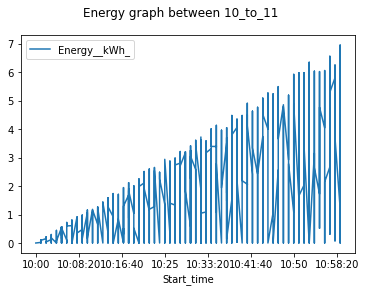

In [611]:
# for 10_to_11



import pylab as pl


# gathering all records for start time between 10_to_11
df_10_to_11=df_selective[df_selective['start_time_hour_int'] ==10]


# plot for all columns with charge START TIME FROM 10_to_11
df_10_to_11.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 10_to_11 ")

print("All Records with charging between 10_to_11: ")

# check all records between 10_to_11
df_10_to_11

In [612]:
# for 10_to_11

print("The number of records with null values in the calculated energy for one hour are: ")
print(df_10_to_11['energy_from_start_time_till_end_of_hour_span'].isnull().values.sum())
#find max energy
print("max is: ")
df_10_to_11_max_energy=df_10_to_11['energy_from_start_time_till_end_of_hour_span'].max()
print(df_10_to_11_max_energy)
#find min energy
print("min is: ")
df_10_to_11_min_energy=df_10_to_11['energy_from_start_time_till_end_of_hour_span'].min()
print(df_10_to_11_min_energy)
#find average
avg=(df_10_to_11_max_energy+df_10_to_11_min_energy)/2;
print("average is: ")
print(avg)

#fill all null values with average energy
df_10_to_11['energy_from_start_time_till_end_of_hour_span'] = df_10_to_11['energy_from_start_time_till_end_of_hour_span'].fillna(avg)

#check null values again
print("After fillig all null values with average, the total records still having null values are: ")
print(df_10_to_11['energy_from_start_time_till_end_of_hour_span'].isnull().values.sum())

#calculate total

Total_10_to_11 = df_11_to_12['energy_from_start_time_till_end_of_hour_span'].sum()
print("Total consumption between 10_to_11: ")
print(Total_10_to_11)

print("")


The number of records with null values in the calculated energy for one hour are: 
22
max is: 
6.9384
min is: 
0.0
average is: 
3.4692
After fillig all null values with average, the total records still having null values are: 
0
Total consumption between 10_to_11: 
4233.9146



<ipython-input-612-58d122bec958>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10_to_11['energy_from_start_time_till_end_of_hour_span'] = df_10_to_11['energy_from_start_time_till_end_of_hour_span'].fillna(avg)


All Records with charging between 11_to_12: 


,ObjectId,Energy__kWh_,Start_time,start_time_in_minutes,start_time_in_hrs,start_time_in_hrs_int,start_time_in_hrs_round_0,End_time,end_time_in_minutes,end_time_in_hrs,end_time_in_hrs_int,charge_duration_in_minutes,charge_duration_in_hours,Energy__kWh_per_minute,Start_time_string,total_minutes_charged_in_1hour_from_start_time,start_time_hour,total_minutes_charged_in_1hour_from_start_time_int,start_time_hour_int,energy_from_start_time_till_end_of_hour_span
21,22,8.501,11:51:00,711,11.85,11,12.0,14:09:00,849,14.15,14,138.0,2.30,0.0616,11:51:00,51,11,51,11,3.1416
25,26,20.589,11:37:00,697,11.62,11,12.0,15:16:00,916,15.27,15,219.0,3.65,0.0940,11:37:00,37,11,37,11,3.4780
28,29,0.000,11:02:00,662,11.03,11,11.0,11:02:00,662,11.03,11,0.0,0.00,NaN,11:02:00,02,11,2,11,NaN
29,30,2.797,11:21:00,681,11.35,11,11.0,14:43:00,883,14.72,14,202.0,3.37,0.0138,11:21:00,21,11,21,11,0.2898
30,31,2.440,11:27:00,687,11.45,11,11.0,12:49:00,769,12.82,12,82.0,1.37,0.0298,11:27:00,27,11,27,11,0.8046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25508,25509,1.020,11:22:00,682,11.37,11,11.0,11:33:00,693,11.55,11,11.0,0.18,0.0927,11:22:00,22,11,22,11,2.0394
25572,25573,4.460,11:06:00,666,11.10,11,11.0,11:51:00,711,11.85,11,45.0,0.75,0.0991,11:06:00,06,11,6,11,0.5946
25573,25574,15.173,11:31:00,691,11.52,11,12.0,14:00:00,840,14.00,14,149.0,2.48,0.1018,11:31:00,31,11,31,11,3.1558
25574,25575,14.896,11:31:00,691,11.52,11,12.0,13:47:00,827,13.78,13,136.0,2.27,0.1095,11:31:00,31,11,31,11,3.3945


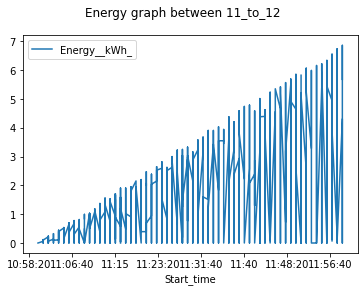

In [613]:
# for 11_to_12



import pylab as pl


# gathering all records for start time between 11_to_12
df_11_to_12=df_selective[df_selective['start_time_hour_int'] ==11]


# plot for all columns with charge START TIME FROM 11_to_12
df_11_to_12.plot(x='Start_time', y='energy_from_start_time_till_end_of_hour_span', label='Energy__kWh_') 


pl.suptitle("Energy graph between 11_to_12 ")

print("All Records with charging between 11_to_12: ")

# check all records between 11_to_12
df_11_to_12




In [614]:
# for 11_to_12

print("The number of records with null values in the calculated energy for one hour are: ")
print(df_11_to_12['energy_from_start_time_till_end_of_hour_span'].isnull().values.sum())
#find max energy
print("max is: ")
df_11_to_12_max_energy=df_11_to_12['energy_from_start_time_till_end_of_hour_span'].max()
print(df_11_to_12_max_energy)
#find min energy
print("min is: ")
df_11_to_12_min_energy=df_11_to_12['energy_from_start_time_till_end_of_hour_span'].min()
print(df_11_to_12_min_energy)
#find average
avg=(df_11_to_12_max_energy+df_11_to_12_min_energy)/2;
print("average is: ")
print(avg)

#fill all null values with average energy
df_11_to_12['energy_from_start_time_till_end_of_hour_span'] = df_11_to_12['energy_from_start_time_till_end_of_hour_span'].fillna(avg)

#check null values again
print("After fillig all null values with average, the total records still having null values are: ")
print(df_11_to_12['energy_from_start_time_till_end_of_hour_span'].isnull().values.sum())

#calculate total

Total_11_to_12 = df_11_to_12['energy_from_start_time_till_end_of_hour_span'].sum()
print("Total consumption between 11_to_12: ")
print(Total_11_to_12)

print("")


The number of records with null values in the calculated energy for one hour are: 
16
max is: 
6.8617
min is: 
0.0
average is: 
3.43085
After fillig all null values with average, the total records still having null values are: 
0
Total consumption between 11_to_12: 
4233.9146



<ipython-input-614-fcdfc96b34c2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_11_to_12['energy_from_start_time_till_end_of_hour_span'] = df_11_to_12['energy_from_start_time_till_end_of_hour_span'].fillna(avg)


In [615]:
df_final=df_selective.drop(columns=['start_time_in_minutes','start_time_in_hrs','start_time_in_hrs_int','start_time_in_hrs_round_0','end_time_in_minutes','end_time_in_hrs','end_time_in_hrs_int','charge_duration_in_hours','Start_time_string','total_minutes_charged_in_1hour_from_start_time','start_time_hour'])

In [616]:

Total_12_to_13 = df_12_to_13['energy_from_start_time_till_end_of_hour_span'].sum()
print("Total consumption between 12_to_13")
print(Total_12_to_13)

print("")

Total consumption between 12_to_13
inf

